### Data Exploration - Bureau Data

### Bureau Data

Step 4: Because our performance numbers using just the application_train data were pretty dismal, we'll look at credit bureau data to form a more complete picture of our loan applicants.  Hopefully adding some additional data to our profile will help improve our performance.

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer

# Show all of the data in a dataframe
pd.set_option('display.max_columns', None)

### Load Data

In [2]:
# Training Set
application_train = pd.read_csv('data/tmp/application_train_full_new_features.csv', index_col=0)
application_test = pd.read_csv('data/tmp/application_test_full_new_features.csv', index_col=0)

print("Loaded Training Set: {0} rows {1} columns".format(application_train.shape[0], application_train.shape[1]))
print("Loaded Testing Set: {0} rows {1} columns".format(application_test.shape[0], application_test.shape[1]))

bureau_data = pd.read_csv('data/bureau.csv')
print("Loaded Bureau Set: {0} rows".format(bureau_data.shape[0]))

bureau_balance_data = pd.read_csv('data/bureau_balance.csv')
print("Loaded Bureau Balance Set: {0} rows".format(bureau_balance_data.shape[0]))

Loaded Training Set: 307511 rows 272 columns
Loaded Testing Set: 48744 rows 271 columns
Loaded Bureau Set: 1716428 rows
Loaded Bureau Balance Set: 27299925 rows


In [3]:
non_numeric_features = []    # non-numeric features for one-hot encoding
numeric_features = []        # numeric features (for feature scaling)
string_to_bool_features = [] # boolean features (that need conversion from string to binary)
log_transform_features = []  # skewed features that need log transformation

### Inspect Data

#### Application Data

In [4]:
display(application_train.head())

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,BOOL_FLAG_EMAIL,BOOL_FLAG_EMP_PHONE,BOOL_FLAG_OWN_CAR,BOOL_FLAG_OWN_REALTY,BOOL_FLAG_PHONE,BOOL_FLAG_WORK_PHONE,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_MOBIL,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUR_APPR_PROCESS_START_0,HOUR_APPR_PROCESS_START_1,HOUR_APPR_PROCESS_START_10,HOUR_APPR_PROCESS_START_11,HOUR_APPR_PROCESS_START_12,HOUR_APPR_PROCESS_START_13,HOUR_APPR_PROCESS_START_14,HOUR_APPR_PROCESS_START_15,HOUR_APPR_PROCESS_START_16,HOUR_APPR_PROCESS_START_17,HOUR_APPR_PROCESS_START_18,HOUR_APPR_PROCESS_START_19,HOUR_APPR_PROCESS_START_2,HOUR_APPR_PROCESS_START_20,HOUR_APPR_PROCESS_START_21,HOUR_APPR_PROCESS_START_22,HOUR_APPR_PROCESS_START_23,HOUR_APPR_PROCESS_START_3,HOUR_APPR_PROCESS_START_4,HOUR_APPR_PROCESS_START_5,HOUR_APPR_PROCESS_START_6,HOUR_APPR_PROCESS_START_7,HOUR_APPR_PROCESS_START_8,HOUR_APPR_PROCESS_START_9,HOUSETYPE_MODE_not specified,HOUSETYPE_MODE_org spec account,HOUSETYPE_MODE_reg oper account,HOUSETYPE_MODE_reg oper spec account,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUP

#### Bureau Data

In [5]:
display(bureau_data.head(n=10))

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.00,71017.38,108982.62,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.80,42103.80,0.00,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,76878.45,0.00,0.00,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,103007.70,0.00,0.00,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.00,0.00,0.00,0.0,Credit card,-690,NaN


#### Bureau Balance Data

In [6]:
display(bureau_balance_data.head(n=10))

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


### Utility Functions

In [7]:
# Visualize the contents of a non-numeric column

def explore_non_numeric(field, showDetails=True):

    # Inspired By: 
    # https://stackoverflow.com/questions/10741346/numpy-most-efficient-frequency-counts-for-unique-values-in-an-array

    unique, counts = np.unique(field, return_counts=True)
    total_records = np.size(field)

    if (showDetails): 
        i = 0
        while i < np.size(unique): 
            percentage = (counts[i] / total_records) * 100
            print("Value: {0} Count: {1} Percentage: {2}".format(unique[i], counts[i], percentage))
            i += 1

    # Example code from: https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html
    fig1, ax1 = plt.subplots()
    ax1.pie(counts, labels=unique, autopct='%1.1f%%',shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

In [8]:
# Visualize the contents of a numeric column

def explore_numeric(field, showUnique=False, graphType="dist", bins=20, showMeanLines=True):     
    mean = np.mean(field)
    avg = np.average(field)
    
    # Take a look at the range
    print("Max: {0} Min: {1} Mean: {2} Avg: {3} Std: {4}".format(
    np.max(field),
    np.min(field),
    mean,
    avg,
    np.std(field)))

    # Unique Values
    # print("Values: {0}".format(application_train['CNT_CHILDREN'].unique()))

    if (showUnique): 
    
        unique, counts = np.unique(application_train['CNT_CHILDREN'], return_counts=True)
        total_records = np.size(application_train['CNT_CHILDREN'])

        i = 0
        while i < np.size(unique): 
            percentage = (counts[i] / total_records) * 100
            print("Value: {0} Count: {1} Percentage: {2}".format(unique[i], counts[i], percentage))
            i += 1

    # Examine distribution
    plt.figure(figsize=(15,10))
    plt.title("Distribution Graph")
    if (showMeanLines):
        plt.axvline(avg, color="red")    # Plot the average
        plt.axvline(mean, color="green") # Plot the mean
    
    if (graphType == "hist"): 
        sns.distplot(field,bins=bins)
    else: 
        sns.distplot(field)

### Original Fields
The unedited fields from burea_data and bureau_balance_data.  We'll need to use these to create features that we can combine with the application_train dataset.

#### CREDIT_TYPE
Type of Credit Bureau credit (Car, cash,...)

Value: 0 Count: 1017 Percentage: 0.05925095605524962
Value: 1 Count: 27690 Percentage: 1.6132339952506018
Value: 2 Count: 56 Percentage: 0.003262589517299881
Value: 3 Count: 1251615 Percentage: 72.91974961955876
Value: 4 Count: 402195 Percentage: 23.43209269482903
Value: 5 Count: 1 Percentage: 5.826052709464073e-05
Value: 6 Count: 1975 Percentage: 0.11506454101191543
Value: 7 Count: 4 Percentage: 0.00023304210837856292
Value: 8 Count: 19 Percentage: 0.001106950014798174
Value: 9 Count: 469 Percentage: 0.027324187207386504
Value: 10 Count: 12413 Percentage: 0.7231879228257754
Value: 11 Count: 1 Percentage: 5.826052709464073e-05
Value: 12 Count: 18391 Percentage: 1.0714693537975377
Value: 13 Count: 27 Percentage: 0.0015730342315552995
Value: 14 Count: 555 Percentage: 0.03233459253752561


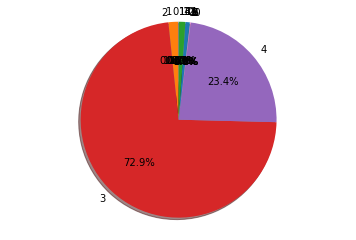

In [9]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

# The CREDIT_TYPE labels were pretty ridiculous.  Encoding them as Integers for ease of use.

bureau_data["CREDIT_TYPE_CODE"] = lb_make.fit_transform(bureau_data["CREDIT_TYPE"])
bureau_data[["CREDIT_TYPE", "CREDIT_TYPE_CODE"]].head(11)

explore_non_numeric(bureau_data['CREDIT_TYPE_CODE'])

non_numeric_features.append('CREDIT_TYPE_CODE')

#### CREDIT_ACTIVE
Status of the Credit Bureau (CB) reported credits

Value: 0 Count: 630607 Percentage: 36.739496209570106
Value: 1 Count: 21 Percentage: 0.0012234710689874554
Value: 2 Count: 1079273 Percentage: 62.87901385901419
Value: 3 Count: 6527 Percentage: 0.38026646034672007


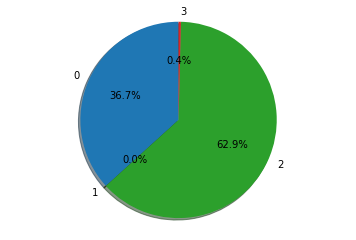

In [10]:
lb_make = LabelEncoder()

# The CREDIT_TYPE labels were pretty ridiculous.  Encoding them as Integers for ease of use.

bureau_data["CREDIT_ACTIVE_CODE"] = lb_make.fit_transform(bureau_data["CREDIT_ACTIVE"])
bureau_data[["CREDIT_ACTIVE", "CREDIT_ACTIVE_CODE"]].head(11)

explore_non_numeric(bureau_data['CREDIT_ACTIVE_CODE'])

non_numeric_features.append('CREDIT_ACTIVE_CODE')

#### CREDIT_CURRENCY
Recoded currency of the Credit Bureau credit

Value: 0 Count: 1715020 Percentage: 99.91796917785074
Value: 1 Count: 1224 Percentage: 0.07131088516384025
Value: 2 Count: 174 Percentage: 0.010137331714467486
Value: 3 Count: 10 Percentage: 0.0005826052709464073


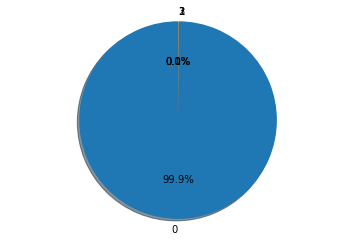

In [11]:
lb_make = LabelEncoder()

# The CREDIT_CURRENCY labels were pretty ridiculous.  Encoding them as Integers for ease of use.

bureau_data["CREDIT_CURRENCY_CODE"] = lb_make.fit_transform(bureau_data["CREDIT_CURRENCY"])
bureau_data[["CREDIT_CURRENCY", "CREDIT_CURRENCY_CODE"]].head(11)

explore_non_numeric(bureau_data['CREDIT_CURRENCY_CODE'])

non_numeric_features.append('CREDIT_CURRENCY_CODE')

### DAYS_CREDIT
How many days before current application did client apply for Credit Bureau credit

Max: 0 Min: -2922 Mean: -1142.107684680045 Avg: -1142.107684680045 Std: 795.1646965716541


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


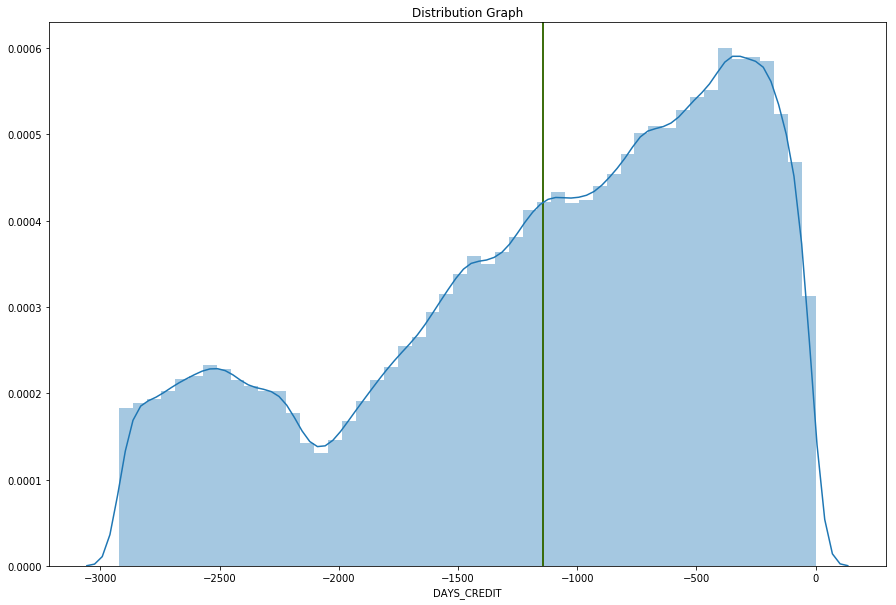

In [12]:
explore_numeric(bureau_data['DAYS_CREDIT']) 

##### CREDIT_DAY_OVERDUE
Number of days past due on CB credit at the time of application for related loan in our sample

Max: 2792 Min: 0 Mean: 0.8181665645165425 Avg: 0.8181665645165425 Std: 36.54441736067727


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


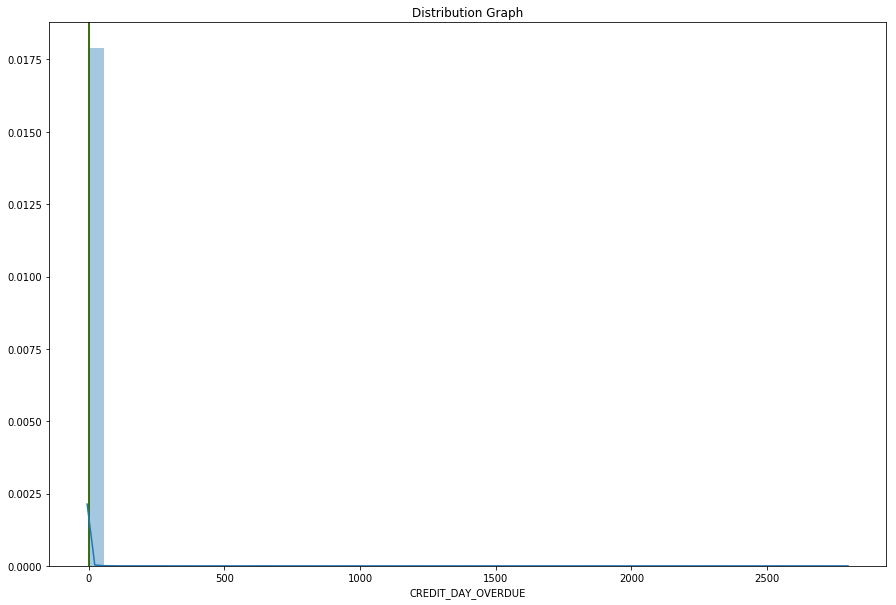

In [13]:
explore_numeric(bureau_data['CREDIT_DAY_OVERDUE'])

#### DAYS_CREDIT_ENDDATE
Remaining duration of CB credit (in days) at the time of application in Home Credit

Max: 31199.0 Min: -42060.0 Mean: 479.12272230469324 Avg: 479.12272230469324 Std: 4839.774610490461


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


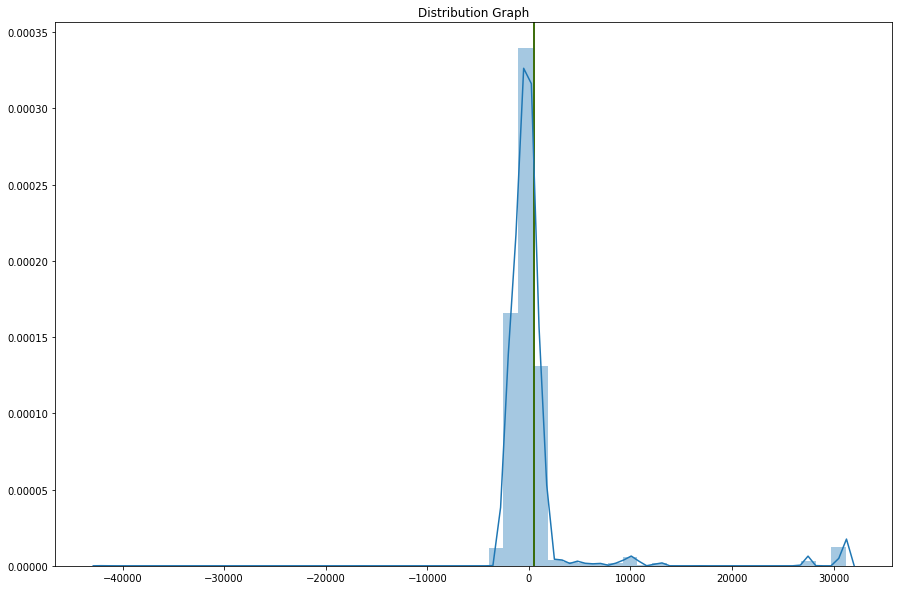

In [14]:
days_credit_enddate = np.nan_to_num(bureau_data['DAYS_CREDIT_ENDDATE'])
explore_numeric(days_credit_enddate)

#### DAYS_ENDDATE_FACT
Days since CB credit ended at the time of application in Home Credit (only for closed credit)

Max: 0.0 Min: -42023.0 Mean: -641.830305727942 Avg: -641.830305727942 Std: 750.1199610264179


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


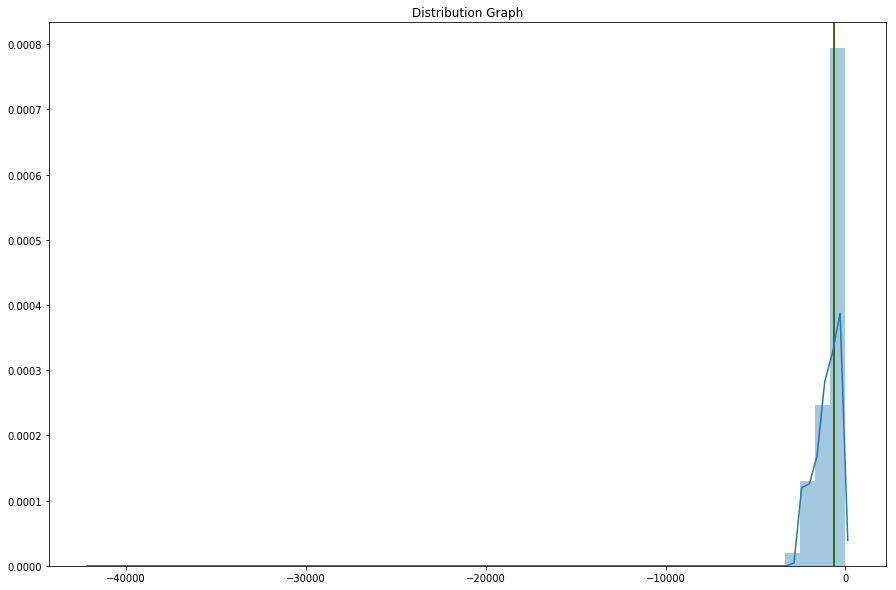

In [15]:
# Convert Non-Numerics
days_enddate = np.nan_to_num(bureau_data['DAYS_ENDDATE_FACT'], copy=True)
explore_numeric(days_enddate)

#### AMT_CREDIT_MAX_OVERDUE
Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample)

Max: 115987185.0 Min: 0.0 Mean: 1319.2617053636973 Avg: 1319.2617053636973 Std: 121006.46317626638


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


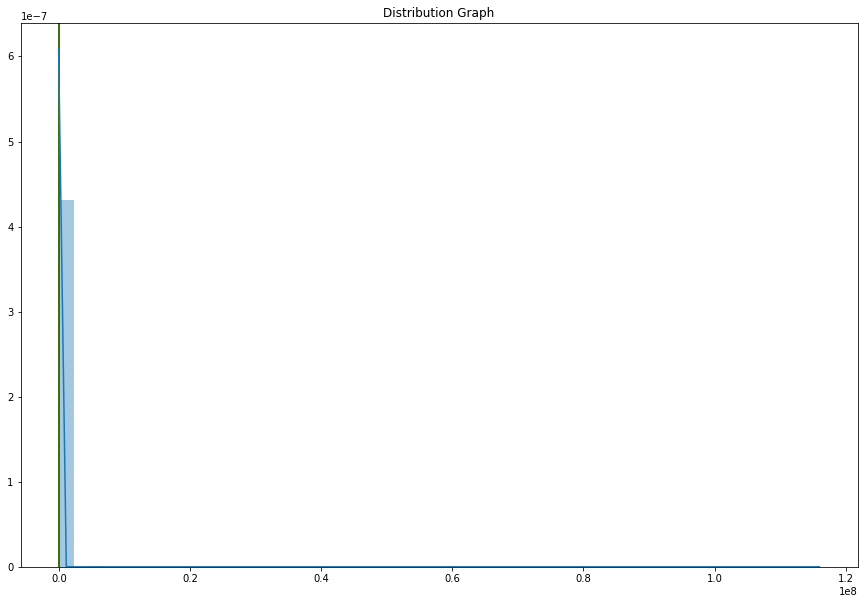

In [16]:
# Convert Non-Numerics
amt_credit_max_overdue = np.nan_to_num(bureau_data['AMT_CREDIT_MAX_OVERDUE'])
explore_numeric(amt_credit_max_overdue)

#### CNT_CREDIT_PROLONG
How many times was the Credit Bureau credit prolonged

Max: 9 Min: 0 Mean: 0.00641040579622332 Avg: 0.00641040579622332 Std: 0.09622387768971509


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


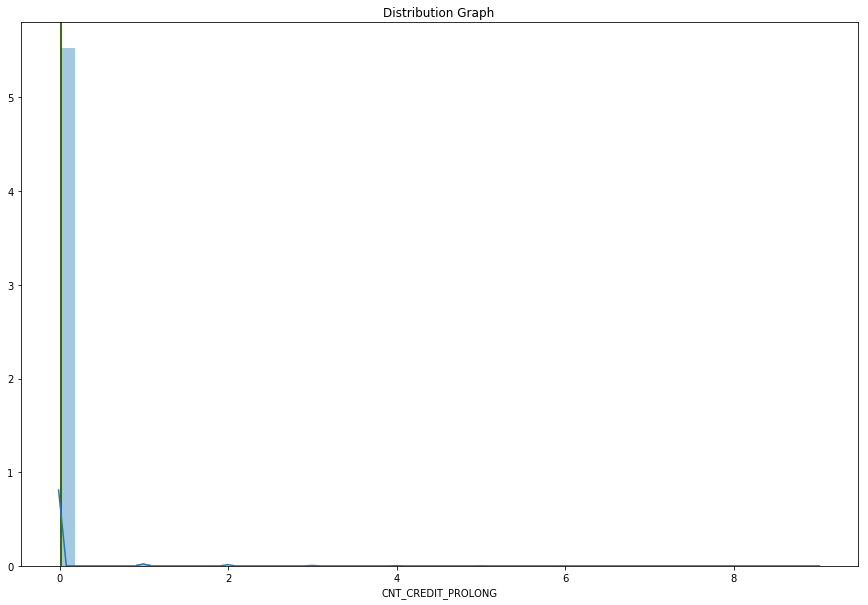

In [17]:
explore_numeric(bureau_data['CNT_CREDIT_PROLONG'])

#### AMT_CREDIT_SUM
Current credit amount for the Credit Bureau creditz

Max: 585000000.0 Min: 0.0 Mean: 354991.9032353073 Avg: 354991.9032353073 Std: 1149807.0698196827


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


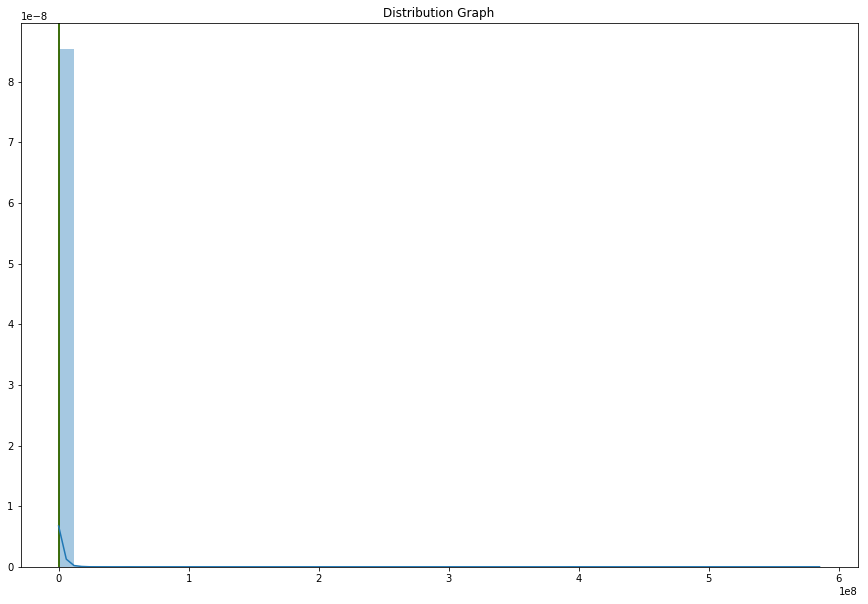

In [18]:
amt_credit_sum = bureau_data['AMT_CREDIT_SUM']
amt_credit_sum = np.nan_to_num(amt_credit_sum)

explore_numeric(amt_credit_sum)

#### Preprocessing: 
This feature is skewed right, in that we have a large number of values near zero, and body of other values distributed across the range.

It's common to do a log transformation for fields like this. The result looks normally distributed.

Max: 20.187122406905534 Min: 0.0 Mean: 11.408674277369942 Avg: 11.408674277369942 Std: 2.626797401787161


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


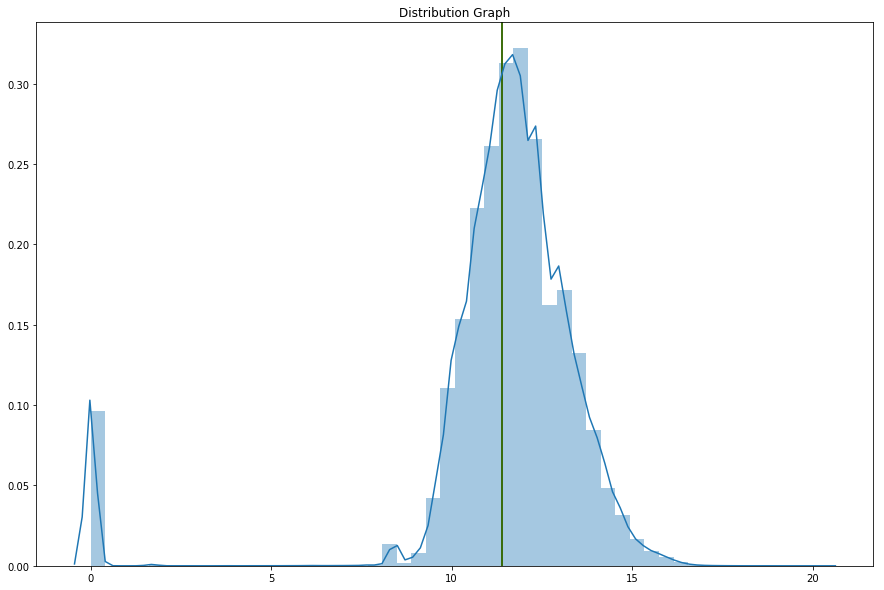

In [19]:
amt_credit_sum = bureau_data['AMT_CREDIT_SUM']
amt_credit_sum_transformed = amt_credit_sum.apply(lambda x: np.log(x + 1))
amt_credit_sum_transformed_numeric = np.nan_to_num(amt_credit_sum_transformed, copy=True)

#visualize the new distribution
explore_numeric(amt_credit_sum_transformed_numeric)

#### AMT_CREDIT_SUM_DEBT
Current debt on Credit Bureau credit

Max: 170100000.0 Min: -4705600.32 Mean: 116505.9952973815 Avg: 116505.9952973815 Std: 626405.636085571


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


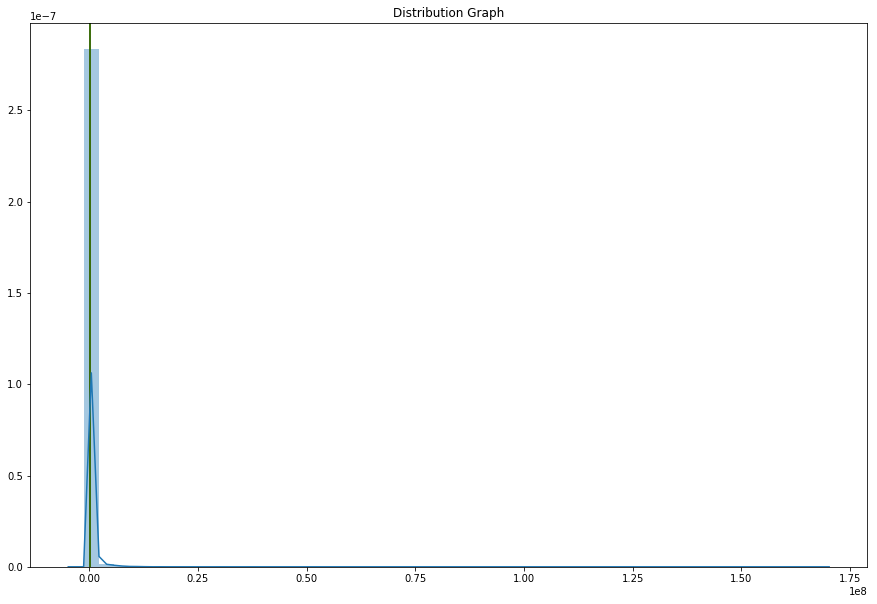

In [20]:
amt_credit_sum_debt = bureau_data['AMT_CREDIT_SUM_DEBT']
amt_credit_sum_debt = np.nan_to_num(amt_credit_sum_debt)

explore_numeric(amt_credit_sum_debt)

#### Preprocessing: 
This feature is skewed right, in that we have a large number of values near zero, and body of other values distributed across the range.

It's common to do a log transformation for fields like this. The result looks normally distributed.

Max: 18.951897063244985 Min: -4.605170185988091 Mean: 3.021237079439292 Avg: 3.021237079439292 Std: 5.256694412721233


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


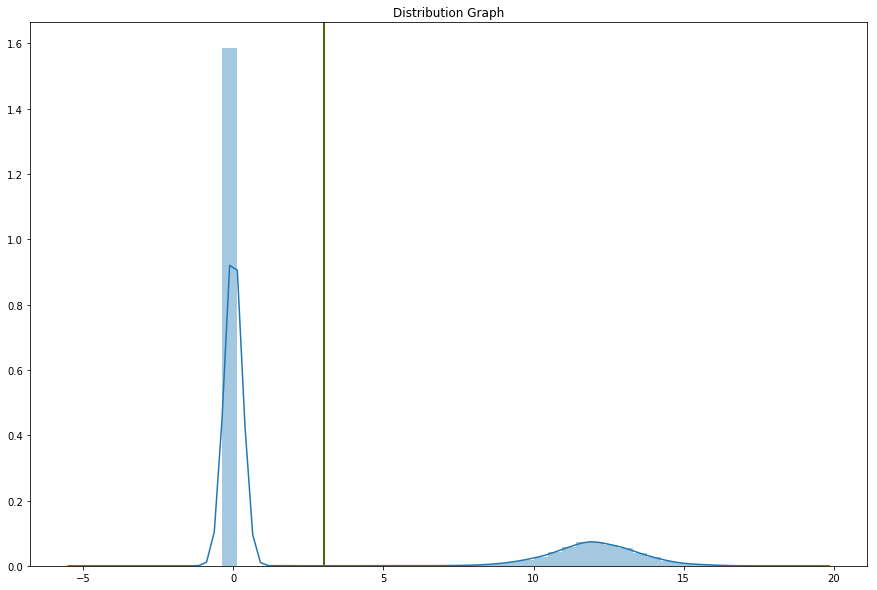

In [21]:
amt_credit_sum_debt = bureau_data['AMT_CREDIT_SUM_DEBT']
amt_credit_sum_debt_transformed = amt_credit_sum_debt.apply(lambda x: np.log(x + 1))
amt_credit_sum_debt_transformed_numeric = np.nan_to_num(amt_credit_sum_debt_transformed, copy=True)

#visualize the new distribution
explore_numeric(amt_credit_sum_debt_transformed_numeric)

#### AMT_CREDIT_SUM_LIMIT
Current credit limit of credit card reported in Credit Bureau

Max: 4705600.32 Min: -586406.115 Mean: 4081.739265244451 Avg: 4081.739265244451 Std: 36571.67496465721


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


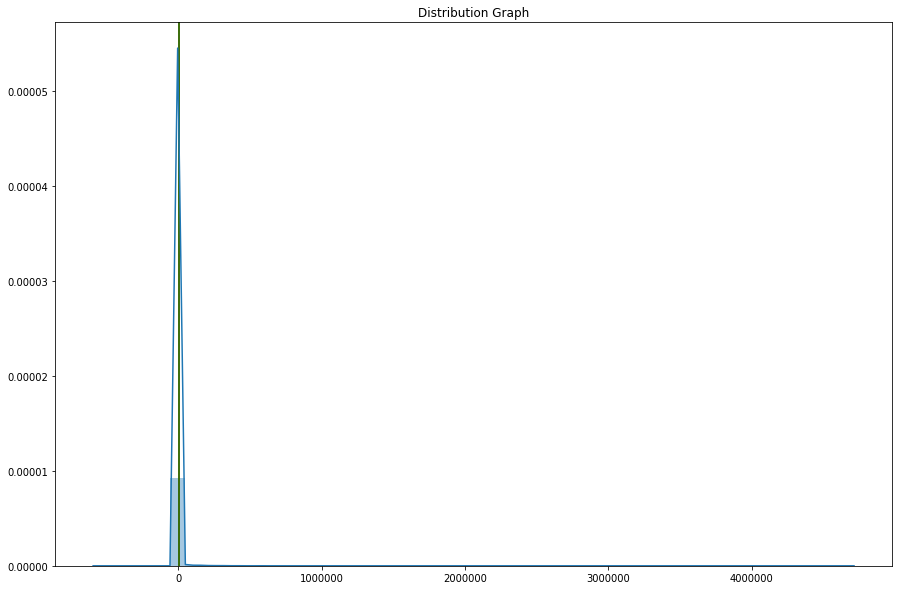

In [22]:
amt_credit_sum_limit = bureau_data['AMT_CREDIT_SUM_LIMIT']
amt_credit_sum_limit = np.nan_to_num(amt_credit_sum_limit)

explore_numeric(amt_credit_sum_limit)

#### Preprocessing: 
This feature is skewed right, in that we have a large number of values near zero, and body of other values distributed across the range.

It's common to do a log transformation for fields like this. The result looks normally distributed.

Max: 15.364264127298659 Min: -0.19845093872383818 Mean: 0.43162418297266103 Avg: 0.43162418297266103 Std: 2.09104664865829


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


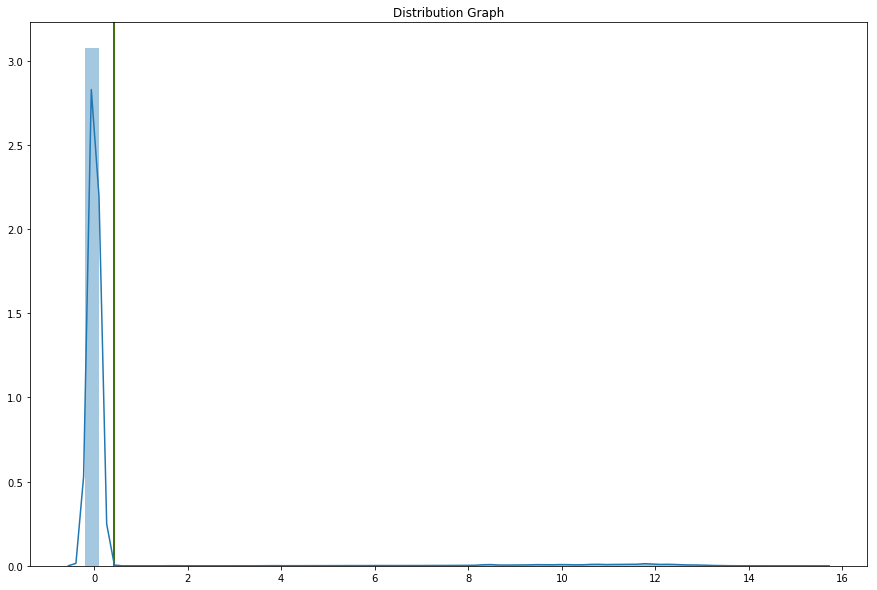

In [23]:
amt_credit_sum_limit = bureau_data['AMT_CREDIT_SUM_LIMIT']
amt_credit_sum_limit_transformed = amt_credit_sum_limit.apply(lambda x: np.log(x + 1))
amt_credit_sum_limit_transformed_numeric = np.nan_to_num(amt_credit_sum_limit_transformed, copy=True)

#visualize the new distribution
explore_numeric(amt_credit_sum_limit_transformed_numeric)

#### AMT_CREDIT_SUM_OVERDUE
Current amount overdue on Credit Bureau credit

Max: 3756681.0 Min: 0.0 Mean: 37.91275774165884 Avg: 37.91275774165884 Std: 5937.648305249403


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


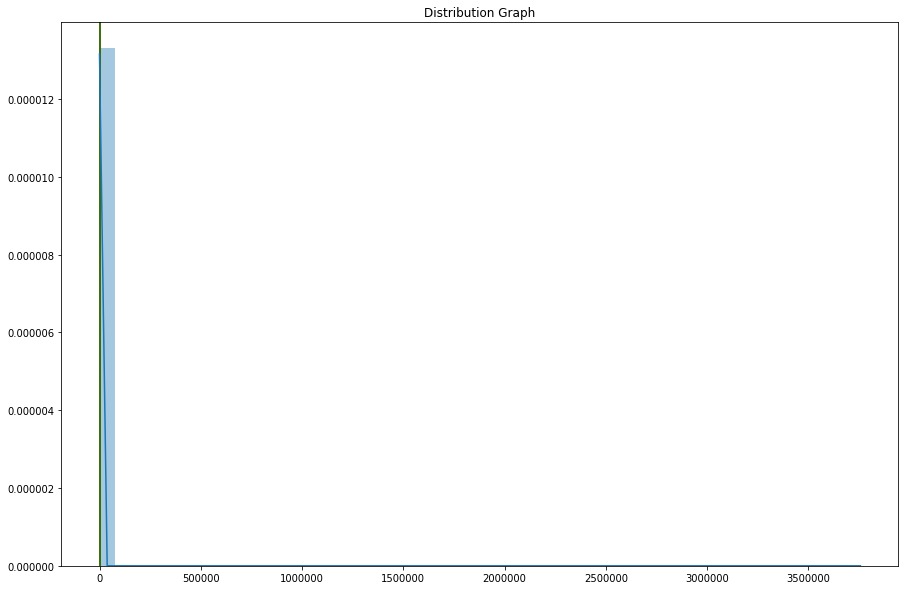

In [24]:
amt_credit_sum_overdue = bureau_data['AMT_CREDIT_SUM_OVERDUE']
amt_credit_sum_overdue = np.nan_to_num(amt_credit_sum_overdue)

explore_numeric(amt_credit_sum_overdue)

#### Preprocessing: 
This feature is skewed right, in that we have a large number of values near zero, and body of other values distributed across the range.

It's common to do a log transformation for fields like this. The result looks normally distributed.

Max: 15.139046678972173 Min: 0.0 Mean: 0.014190591395794587 Avg: 0.014190591395794587 Std: 0.31729931212689577


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


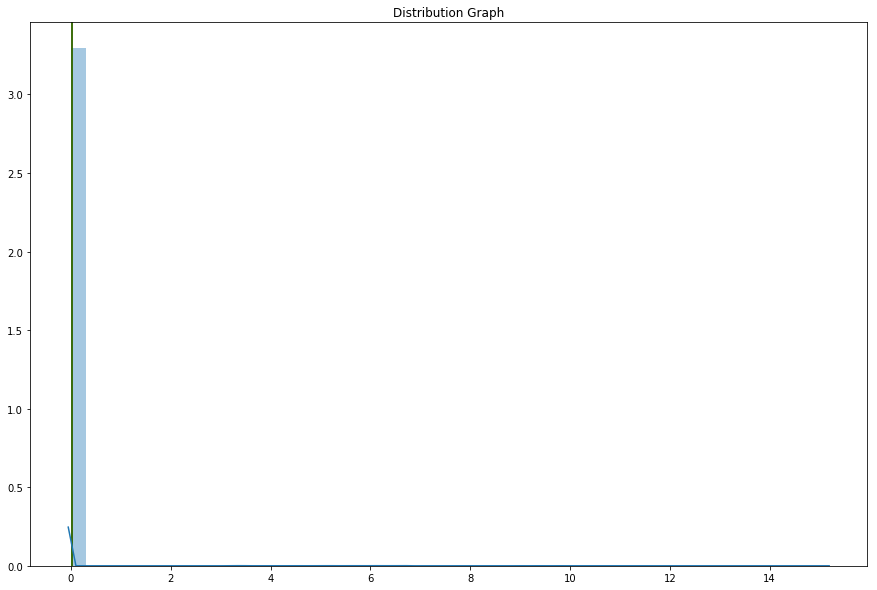

In [25]:
amt_credit_sum_overdue = bureau_data['AMT_CREDIT_SUM_OVERDUE']
amt_credit_sum_overdue_transformed = amt_credit_sum_overdue.apply(lambda x: np.log(x + 1))
amt_credit_sum_overdue_transformed_numeric = np.nan_to_num(amt_credit_sum_overdue_transformed, copy=True)

#visualize the new distribution
explore_numeric(amt_credit_sum_overdue_transformed_numeric)

#### DAYS_CREDIT_UPDATE
How many days before loan application did last information about the Credit Bureau credit come

Max: 372 Min: -41947 Mean: -593.7483197663986 Avg: -593.7483197663986 Std: 720.7471015455408


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


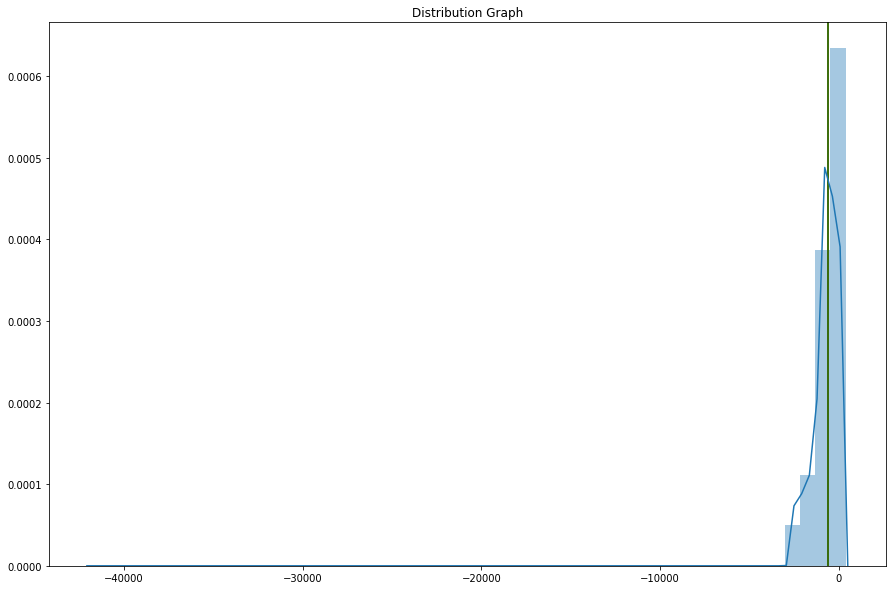

In [26]:
days_credit_update = np.nan_to_num(bureau_data['DAYS_CREDIT_UPDATE'])
explore_numeric(days_credit_update)

#### MONTHS_BALANCE
Month of balance relative to application date 

NOTE: There's a one-to-many relationship between bureau_balance_data and bureau_data, and this dataset is really large.  We'll need to do some feature engineering, like summing up the records per SK_BUREAU_ID or something just to make this managable.  This graph took ~15 minutes to draw... 

In [27]:
#Note: This takes an inordinate amount of time to draw.  It's a large dataset.  Uncomment it if you want.  Nothing special.
#explore_numeric(bureau_balance_data['MONTHS_BALANCE'])

#### STATUS
Status of Credit Bureau loan during the month (active, closed, DPD0-30,ÔøΩ [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,ÔøΩ 5 means DPD 120+ or sold or written off ]

Value: 0 Count: 7499507 Percentage: 27.470797080944358
Value: 1 Count: 242347 Percentage: 0.8877203875102222
Value: 2 Count: 23419 Percentage: 0.08578411845453787
Value: 3 Count: 8924 Percentage: 0.03268873449286033
Value: 4 Count: 5847 Percentage: 0.0214176412572562
Value: 5 Count: 62406 Percentage: 0.22859403459899616
Value: C Count: 13646993 Percentage: 49.98912268073997
Value: X Count: 5810482 Percentage: 21.283875322001798


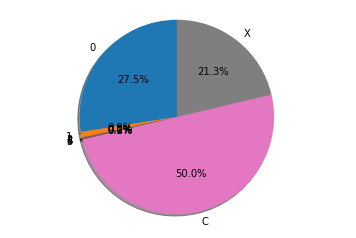

In [28]:
explore_non_numeric(bureau_balance_data['STATUS'])

### Feature Engineering

We have a situation where bureau_data has a one-to-many relationship with application_train, and bureau_balance_data has a one-to-many relationship with bureau_data; however, we need to present the data as a DataFrame to the classifier.

To accomplish this, we'll need to do a little feature engineering.

### One-Hot Encode Non Numeric Features

If we one-hot encode the non-numeric features, we can create aggregate counts for the application_data table.

In [29]:
# One-Hot Encode all of our non-numeric features
bureau_data = pd.get_dummies(bureau_data, columns=non_numeric_features)

print("Bureau Data Columns: {0}".format(bureau_data.shape[1]))

Bureau Data Columns: 40


In [30]:
bureau_balance_data = pd.get_dummies(bureau_balance_data, columns=['STATUS'])

print("Bureau Balance Data Columns: {0}".format(bureau_balance_data.shape[1]))

Bureau Balance Data Columns: 10


In [31]:
display(application_train.head())
display(bureau_data.head())
display(bureau_balance_data.head())

### Empty these out.  We're processing a different set of data now. 

non_numeric_features = []    # non-numeric features for one-hot encoding
numeric_features = []        # numeric features (for feature scaling)
string_to_bool_features = [] # boolean features (that need conversion from string to binary)
log_transform_features = []  # skewed features that need log transformation

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,BOOL_FLAG_EMAIL,BOOL_FLAG_EMP_PHONE,BOOL_FLAG_OWN_CAR,BOOL_FLAG_OWN_REALTY,BOOL_FLAG_PHONE,BOOL_FLAG_WORK_PHONE,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_MOBIL,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUR_APPR_PROCESS_START_0,HOUR_APPR_PROCESS_START_1,HOUR_APPR_PROCESS_START_10,HOUR_APPR_PROCESS_START_11,HOUR_APPR_PROCESS_START_12,HOUR_APPR_PROCESS_START_13,HOUR_APPR_PROCESS_START_14,HOUR_APPR_PROCESS_START_15,HOUR_APPR_PROCESS_START_16,HOUR_APPR_PROCESS_START_17,HOUR_APPR_PROCESS_START_18,HOUR_APPR_PROCESS_START_19,HOUR_APPR_PROCESS_START_2,HOUR_APPR_PROCESS_START_20,HOUR_APPR_PROCESS_START_21,HOUR_APPR_PROCESS_START_22,HOUR_APPR_PROCESS_START_23,HOUR_APPR_PROCESS_START_3,HOUR_APPR_PROCESS_START_4,HOUR_APPR_PROCESS_START_5,HOUR_APPR_PROCESS_START_6,HOUR_APPR_PROCESS_START_7,HOUR_APPR_PROCESS_START_8,HOUR_APPR_PROCESS_START_9,HOUSETYPE_MODE_not specified,HOUSETYPE_MODE_org spec account,HOUSETYPE_MODE_reg oper account,HOUSETYPE_MODE_reg oper spec account,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUP

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,CREDIT_TYPE_CODE_0,CREDIT_TYPE_CODE_1,CREDIT_TYPE_CODE_2,CREDIT_TYPE_CODE_3,CREDIT_TYPE_CODE_4,CREDIT_TYPE_CODE_5,CREDIT_TYPE_CODE_6,CREDIT_TYPE_CODE_7,CREDIT_TYPE_CODE_8,CREDIT_TYPE_CODE_9,CREDIT_TYPE_CODE_10,CREDIT_TYPE_CODE_11,CREDIT_TYPE_CODE_12,CREDIT_TYPE_CODE_13,CREDIT_TYPE_CODE_14,CREDIT_ACTIVE_CODE_0,CREDIT_ACTIVE_CODE_1,CREDIT_ACTIVE_CODE_2,CREDIT_ACTIVE_CODE_3,CREDIT_CURRENCY_CODE_0,CREDIT_CURRENCY_CODE_1,CREDIT_CURRENCY_CODE_2,CREDIT_CURRENCY_CODE_3
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
0,5715448,0,0,0,0,0,0,0,1,0
1,5715448,-1,0,0,0,0,0,0,1,0
2,5715448,-2,0,0,0,0,0,0,1,0
3,5715448,-3,0,0,0,0,0,0,1,0
4,5715448,-4,0,0,0,0,0,0,1,0


### New Features

We'll engineer some new features to combine with the application_train data.

In [33]:
display(application_train.head())

new_features = pd.DataFrame()
new_features['SK_ID_CURR'] = application_train['SK_ID_CURR']
display(new_features.head())

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,BOOL_FLAG_EMAIL,BOOL_FLAG_EMP_PHONE,BOOL_FLAG_OWN_CAR,BOOL_FLAG_OWN_REALTY,BOOL_FLAG_PHONE,BOOL_FLAG_WORK_PHONE,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_MOBIL,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUR_APPR_PROCESS_START_0,HOUR_APPR_PROCESS_START_1,HOUR_APPR_PROCESS_START_10,HOUR_APPR_PROCESS_START_11,HOUR_APPR_PROCESS_START_12,HOUR_APPR_PROCESS_START_13,HOUR_APPR_PROCESS_START_14,HOUR_APPR_PROCESS_START_15,HOUR_APPR_PROCESS_START_16,HOUR_APPR_PROCESS_START_17,HOUR_APPR_PROCESS_START_18,HOUR_APPR_PROCESS_START_19,HOUR_APPR_PROCESS_START_2,HOUR_APPR_PROCESS_START_20,HOUR_APPR_PROCESS_START_21,HOUR_APPR_PROCESS_START_22,HOUR_APPR_PROCESS_START_23,HOUR_APPR_PROCESS_START_3,HOUR_APPR_PROCESS_START_4,HOUR_APPR_PROCESS_START_5,HOUR_APPR_PROCESS_START_6,HOUR_APPR_PROCESS_START_7,HOUR_APPR_PROCESS_START_8,HOUR_APPR_PROCESS_START_9,HOUSETYPE_MODE_not specified,HOUSETYPE_MODE_org spec account,HOUSETYPE_MODE_reg oper account,HOUSETYPE_MODE_reg oper spec account,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUP

,SK_ID_CURR
0,100002
1,100003
2,100004
3,100006
4,100007


### NUM_BUREAU_REPORTS
Number of bureau reports for a given SK_ID_CURR

In [34]:
num_reports = bureau_data.groupby('SK_ID_CURR')['SK_ID_BUREAU'].count()
df_num_reports = num_reports.to_frame().reset_index()

# Had a hard time getting this column named correctly... from:
# https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
df_num_reports.rename(columns={'SK_ID_BUREAU': 'NUM_BUREAU_REPORTS'}, inplace=True)

new_features = new_features.merge(df_num_reports, on='SK_ID_CURR')
display(new_features.head())

,SK_ID_CURR,NUM_BUREAU_REPORTS
0,100002,8
1,100003,4
2,100004,2
3,100007,1
4,100008,3


Max: 116 Min: 1 Mean: 5.56119563856071 Avg: 5.56119563856071 Std: 4.377888417769493


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


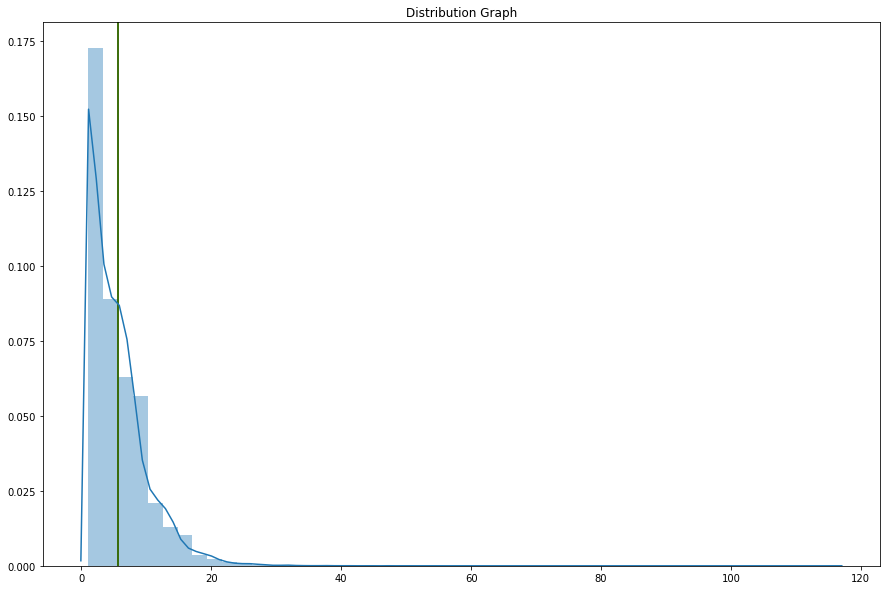

In [35]:
explore_numeric(np.nan_to_num(new_features["NUM_BUREAU_REPORTS"]))

#### Preprocessing: 
This feature is skewed right, in that we have a large number of values near zero, and body of other values distributed across the range.

It's common to do a log transformation for fields like this. The result looks normally distributed.

Max: 4.762173934797756 Min: 0.6931471805599453 Mean: 1.6850041710985884 Avg: 1.6850041710985884 Std: 0.6266337055181641


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


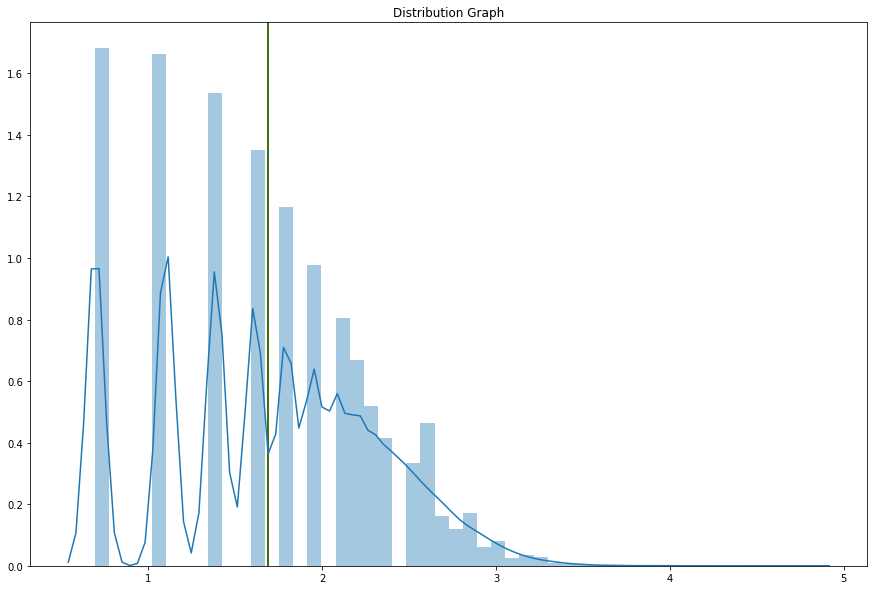

In [36]:
num_bureau_reports = new_features['NUM_BUREAU_REPORTS']
num_bureau_reports = num_bureau_reports.apply(lambda x: np.log(x + 1))
num_bureau_reports = np.nan_to_num(num_bureau_reports)

#visualize the new distribution
explore_numeric(num_bureau_reports)

numeric_features.append('NUM_BUREAU_REPORTS')
#log_transform_features.append('NUM_BUREAU_REPORTS')

### NUM_BUREAU_BALANCES
Number of balances recorded for a given SK_ID_CURR

In [37]:
num_balances = bureau_balance_data.groupby('SK_ID_BUREAU')['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'NUM_BUREAU_BALANCES'})
df_num_balances = pd.DataFrame(data=num_balances, columns=['NUM_BUREAU_BALANCES'])

bureau_data = bureau_data.merge(df_num_balances, on='SK_ID_BUREAU')
bureau_data['NUM_BUREAU_BALANCES'] = bureau_data['NUM_BUREAU_BALANCES'].fillna(0)

In [38]:
display(bureau_data.head())

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,CREDIT_TYPE_CODE_0,CREDIT_TYPE_CODE_1,CREDIT_TYPE_CODE_2,CREDIT_TYPE_CODE_3,CREDIT_TYPE_CODE_4,CREDIT_TYPE_CODE_5,CREDIT_TYPE_CODE_6,CREDIT_TYPE_CODE_7,CREDIT_TYPE_CODE_8,CREDIT_TYPE_CODE_9,CREDIT_TYPE_CODE_10,CREDIT_TYPE_CODE_11,CREDIT_TYPE_CODE_12,CREDIT_TYPE_CODE_13,CREDIT_TYPE_CODE_14,CREDIT_ACTIVE_CODE_0,CREDIT_ACTIVE_CODE_1,CREDIT_ACTIVE_CODE_2,CREDIT_ACTIVE_CODE_3,CREDIT_CURRENCY_CODE_0,CREDIT_CURRENCY_CODE_1,CREDIT_CURRENCY_CODE_2,CREDIT_CURRENCY_CODE_3,NUM_BUREAU_BALANCES
0,380361,5715448,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.0,0.0,67500.0,0.0,Credit card,-183,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,27
1,380361,5715449,Active,currency 1,-357,0,1119.0,NaN,NaN,0,45000.0,0.0,45000.0,0.0,Credit card,-130,2691.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,12
2,380361,5715451,Closed,currency 1,-917,0,-187.0,-759.0,NaN,0,74439.0,0.0,0.0,0.0,Consumer credit,-748,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,26
3,380361,5715452,Closed,currency 1,-993,0,31039.0,-831.0,NaN,0,315000.0,0.0,0.0,0.0,Credit card,-818,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,33
4,380361,5715453,Closed,currency 1,-1146,0,681.0,-780.0,NaN,0,2025000.0,0.0,0.0,0.0,Consumer credit,-769,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,38


### SUM_BUREAU_BALANCES
Now that we have some data in bureau_data, we'll need to summate it for inclusion in the application_train set

,SK_ID_CURR,SUM_BUREAU_BALANCES
0,100001,172
1,100002,110
2,100005,21
3,100010,72
4,100013,230


,SK_ID_CURR,NUM_BUREAU_REPORTS,SUM_BUREAU_BALANCES
0,100002,8,110
1,100010,2,72
2,100019,2,34
3,100032,4,76
4,100033,1,7


Max: 2657 Min: 1 Mean: 159.3998980819898 Avg: 159.3998980819898 Std: 159.19079926225214


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


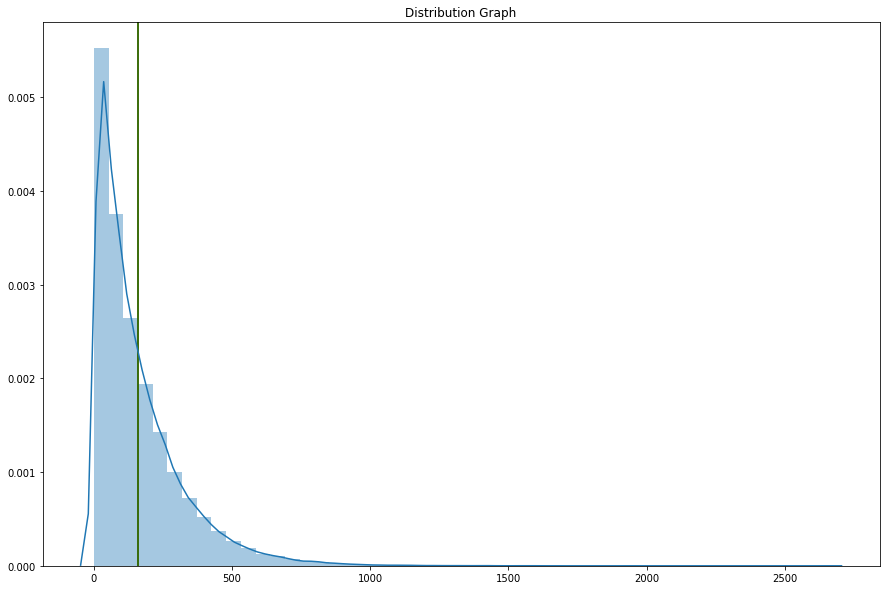

In [39]:
sum_balances = bureau_data.groupby('SK_ID_CURR')['NUM_BUREAU_BALANCES'].sum()

df_sum_balances = sum_balances.to_frame().reset_index()
df_sum_balances.rename(columns={'NUM_BUREAU_BALANCES': 'SUM_BUREAU_BALANCES'}, inplace=True)

display(df_sum_balances.head())

new_features = new_features.merge(df_sum_balances, on='SK_ID_CURR')

display(new_features.head())

explore_numeric(np.nan_to_num(new_features['SUM_BUREAU_BALANCES']))

numeric_features.append('SUM_BUREAU_BALANCES')

### MONTHS_BALANCE


NOTE: We really need to group the MONTHS_BALANCE value by STATUS in order for it to be meaningful, since a closed account with a 60 month balance is pretty different than a default account with a 60 month balance, or a late, open account with a 2 month balance.

### SUM_CURRENCY_CODE

In [40]:
num_codes = 4
credit_active_codes = []

for i in range(0, num_codes): 
    credit_active_codes.append('CREDIT_CURRENCY_CODE_{0}'.format(i))

for code in credit_active_codes: 

    sum_code = bureau_data.groupby('SK_ID_CURR')[code].sum().rename(columns = {'SK_ID_CURR': code})

    new_code = 'SUM_{0}'.format(code)
    df_sum_code = pd.DataFrame(data=sum_code, columns=[new_code])

    new_features = new_features.merge(df_sum_code, on='SK_ID_CURR')
    new_features[new_code] = new_features[new_code].fillna(0)

    numeric_features.append(new_code)     


Max: 6 Min: 0 Mean: 0.0035129186499116348 Avg: 0.0035129186499116348 Std: 0.07867324035188096


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


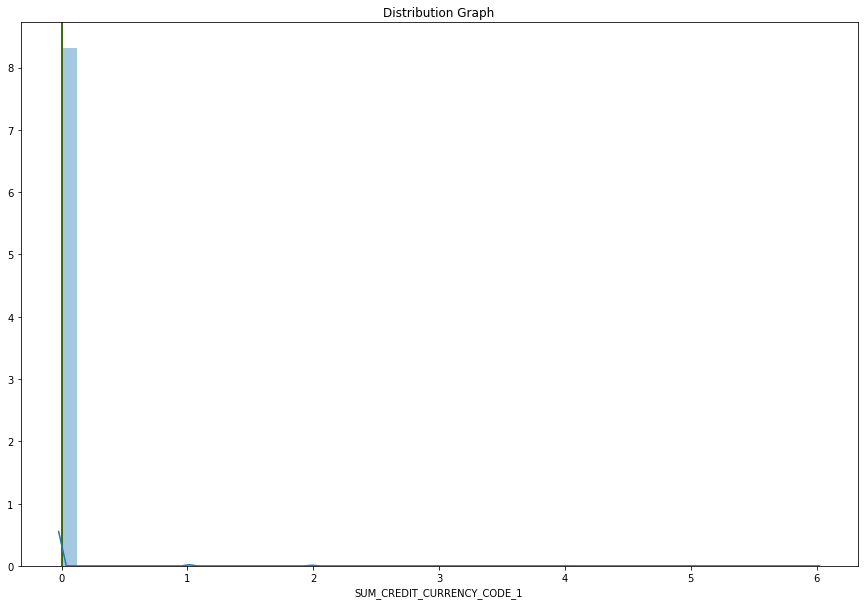

In [41]:
explore_numeric(new_features['SUM_CREDIT_CURRENCY_CODE_1'])

### SUM_CREDIT_ACTIVE_CODE

In [42]:
num_codes = 4
credit_active_codes = []

for i in range(0, num_codes): 
    credit_active_codes.append('CREDIT_ACTIVE_CODE_{0}'.format(i))

for code in credit_active_codes: 

    sum_code = bureau_data.groupby('SK_ID_CURR')[code].sum().rename(columns = {'SK_ID_CURR': code})

    new_code = 'SUM_{0}'.format(code)
    df_sum_code = pd.DataFrame(data=sum_code, columns=[new_code])

    new_features = new_features.merge(df_sum_code, on='SK_ID_CURR')           
    new_features[new_code] = new_features[new_code].fillna(0)

    numeric_features.append(new_code)     

,SK_ID_CURR,NUM_BUREAU_REPORTS,SUM_BUREAU_BALANCES,SUM_CREDIT_CURRENCY_CODE_0,SUM_CREDIT_CURRENCY_CODE_1,SUM_CREDIT_CURRENCY_CODE_2,SUM_CREDIT_CURRENCY_CODE_3,SUM_CREDIT_ACTIVE_CODE_0,SUM_CREDIT_ACTIVE_CODE_1,SUM_CREDIT_ACTIVE_CODE_2,SUM_CREDIT_ACTIVE_CODE_3
0,100002,8,110,8,0,0,0,2,0,6,0
1,100010,2,72,2,0,0,0,1,0,1,0
2,100019,2,34,2,0,0,0,2,0,0,0
3,100032,4,76,4,0,0,0,1,0,3,0
4,100033,1,7,1,0,0,0,1,0,0,0


Max: 5 Min: 0 Mean: 0.02230269649033405 Avg: 0.02230269649033405 Std: 0.16040640213833265


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


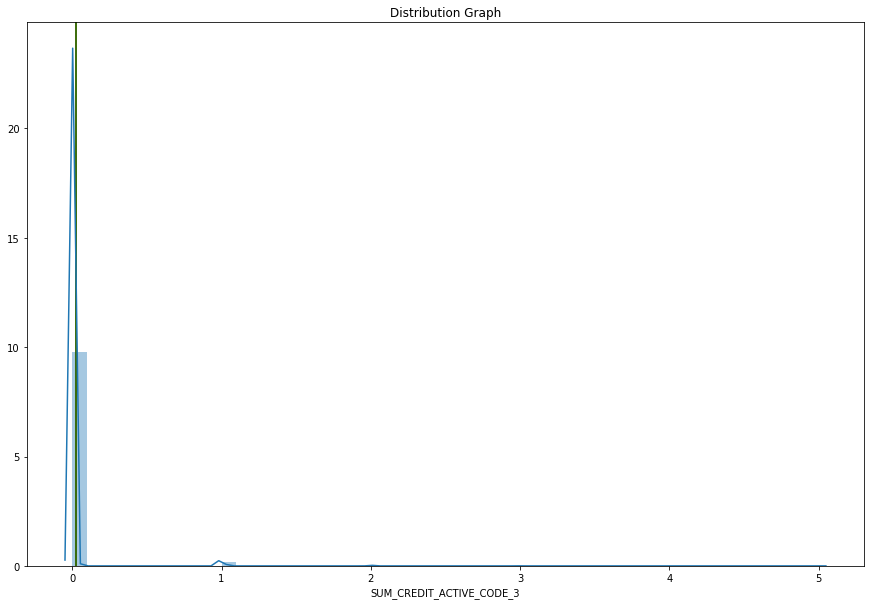

In [43]:
display(new_features.head())
explore_numeric(new_features['SUM_CREDIT_ACTIVE_CODE_3'])

### SUM_CREDIT_TYPE_CODE
Number of balances with a status of 0 recorded for a given SK_ID_BUREAU

In [44]:
num_codes = 15
credit_type_codes = []

for i in range(0, num_codes): 
    credit_type_codes.append('CREDIT_TYPE_CODE_{0}'.format(i))

for code in credit_type_codes: 

    sum_code = bureau_data.groupby('SK_ID_CURR')[code].sum().rename(columns = {'SK_ID_CURR': code})

    new_code = 'SUM_{0}'.format(code)
    df_sum_code = pd.DataFrame(data=sum_code, columns=[new_code])

    new_features = new_features.merge(df_sum_code, on='SK_ID_CURR')
    new_features[new_code] = new_features[new_code].fillna(0)
    
    numeric_features.append(new_code)                

,SK_ID_CURR,NUM_BUREAU_REPORTS,SUM_BUREAU_BALANCES,SUM_CREDIT_CURRENCY_CODE_0,SUM_CREDIT_CURRENCY_CODE_1,SUM_CREDIT_CURRENCY_CODE_2,SUM_CREDIT_CURRENCY_CODE_3,SUM_CREDIT_ACTIVE_CODE_0,SUM_CREDIT_ACTIVE_CODE_1,SUM_CREDIT_ACTIVE_CODE_2,SUM_CREDIT_ACTIVE_CODE_3,SUM_CREDIT_TYPE_CODE_0,SUM_CREDIT_TYPE_CODE_1,SUM_CREDIT_TYPE_CODE_2,SUM_CREDIT_TYPE_CODE_3,SUM_CREDIT_TYPE_CODE_4,SUM_CREDIT_TYPE_CODE_5,SUM_CREDIT_TYPE_CODE_6,SUM_CREDIT_TYPE_CODE_7,SUM_CREDIT_TYPE_CODE_8,SUM_CREDIT_TYPE_CODE_9,SUM_CREDIT_TYPE_CODE_10,SUM_CREDIT_TYPE_CODE_11,SUM_CREDIT_TYPE_CODE_12,SUM_CREDIT_TYPE_CODE_13,SUM_CREDIT_TYPE_CODE_14
0,100002,8,110,8,0,0,0,2,0,6,0,0,0,0,4,4,0,0,0,0,0,0,0,0,0,0
1,100010,2,72,2,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,100019,2,34,2,0,0,0,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
3,100032,4,76,4,0,0,0,1,0,3,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0
4,100033,1,7,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Max: 18 Min: 0 Mean: 1.3205755114874609 Avg: 1.3205755114874609 Std: 1.5078538480324162


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


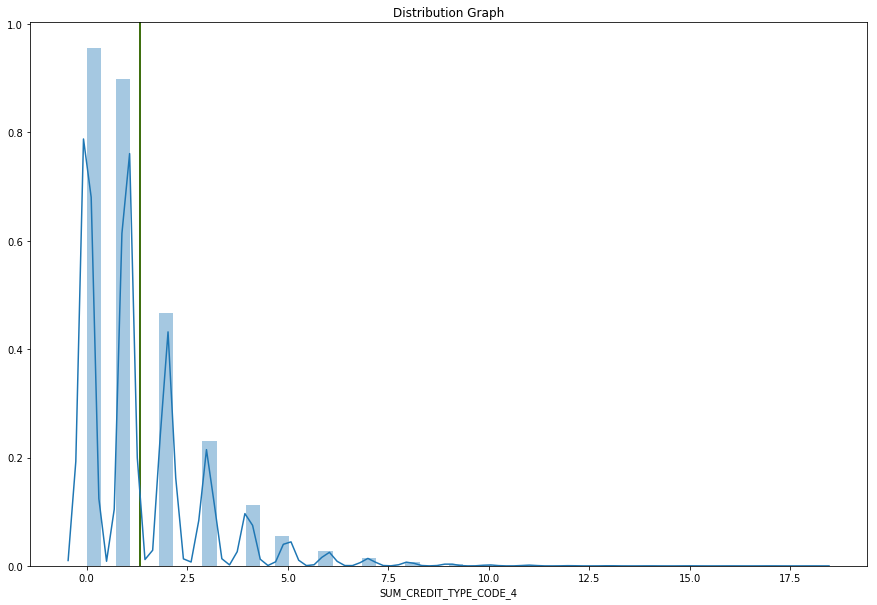

In [45]:
display(new_features.head())
explore_numeric(new_features['SUM_CREDIT_TYPE_CODE_4'])

### SUM_STATUS_X
Number of balances with a status of "x" recorded for a given SK_ID_BUREAU

In [46]:
# All of the possible values for bureau_balance_data.STATUS
codes = ['0','1','2','3','4','5','C','X']

for code in codes: 
    
    cur_code = "STATUS_" + code
    fin_code = "SUM_STATUS_" + code
    
    
    # Count all of the instances of this status code in bureau_balance_data into the corresponding bureau_data record
    sum_status = bureau_balance_data.groupby('SK_ID_BUREAU')[cur_code].sum().rename(columns = {'SK_ID_BUREAU': cur_code})
    
    
    df_sum_status = pd.DataFrame(data=sum_status, columns=[cur_code])
    
    # Summate the count across all corresponding SK_ID_BUREAUs and create a record for each application
    bureau_data = bureau_data.merge(df_sum_status, on='SK_ID_BUREAU')
    bureau_data[cur_code] = bureau_data[cur_code].fillna(0)

    # Merge it into a new dataframe
    sum_all_status = bureau_data.groupby('SK_ID_CURR')[cur_code].sum().rename(columns = {'SK_ID_CURR': fin_code})
    df_sum_all_status = pd.DataFrame(data=sum_all_status, columns=[fin_code])

    new_features = new_features.merge(df_sum_all_status, on='SK_ID_CURR')

    numeric_features.append(fin_code)

In [47]:
display(bureau_balance_data.head())
display(bureau_data.head())
display(new_features.head())

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
0,5715448,0,0,0,0,0,0,0,1,0
1,5715448,-1,0,0,0,0,0,0,1,0
2,5715448,-2,0,0,0,0,0,0,1,0
3,5715448,-3,0,0,0,0,0,0,1,0
4,5715448,-4,0,0,0,0,0,0,1,0


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,CREDIT_TYPE_CODE_0,CREDIT_TYPE_CODE_1,CREDIT_TYPE_CODE_2,CREDIT_TYPE_CODE_3,CREDIT_TYPE_CODE_4,CREDIT_TYPE_CODE_5,CREDIT_TYPE_CODE_6,CREDIT_TYPE_CODE_7,CREDIT_TYPE_CODE_8,CREDIT_TYPE_CODE_9,CREDIT_TYPE_CODE_10,CREDIT_TYPE_CODE_11,CREDIT_TYPE_CODE_12,CREDIT_TYPE_CODE_13,CREDIT_TYPE_CODE_14,CREDIT_ACTIVE_CODE_0,CREDIT_ACTIVE_CODE_1,CREDIT_ACTIVE_CODE_2,CREDIT_ACTIVE_CODE_3,CREDIT_CURRENCY_CODE_0,CREDIT_CURRENCY_CODE_1,CREDIT_CURRENCY_CODE_2,CREDIT_CURRENCY_CODE_3,NUM_BUREAU_BALANCES,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
0,380361,5715448,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.0,0.0,67500.0,0.0,Credit card,-183,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,27,8,0,0,0,0,0,9,10
1,380361,5715449,Active,currency 1,-357,0,1119.0,NaN,NaN,0,45000.0,0.0,45000.0,0.0,Credit card,-130,2691.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,12,5,0,0,0,0,0,6,1
2,380361,5715451,Closed,currency 1,-917,0,-187.0,-759.0,NaN,0,74439.0,0.0,0.0,0.0,Consumer credit,-748,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,26,17,0,0,0,0,0,5,4
3,380361,5715452,Closed,currency 1,-993,0,31039.0,-831.0,NaN,0,315000.0,0.0,0.0,0.0,Credit card,-818,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,33,8,0,0,0,0,0,15,10
4,380361,5715453,Closed,currency 1,-1146,0,681.0,-780.0,NaN,0,2025000.0,0.0,0.0,0.0,Consumer credit,-769,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,38,8,0,0,0,0,0,20,10


,SK_ID_CURR,NUM_BUREAU_REPORTS,SUM_BUREAU_BALANCES,SUM_CREDIT_CURRENCY_CODE_0,SUM_CREDIT_CURRENCY_CODE_1,SUM_CREDIT_CURRENCY_CODE_2,SUM_CREDIT_CURRENCY_CODE_3,SUM_CREDIT_ACTIVE_CODE_0,SUM_CREDIT_ACTIVE_CODE_1,SUM_CREDIT_ACTIVE_CODE_2,SUM_CREDIT_ACTIVE_CODE_3,SUM_CREDIT_TYPE_CODE_0,SUM_CREDIT_TYPE_CODE_1,SUM_CREDIT_TYPE_CODE_2,SUM_CREDIT_TYPE_CODE_3,SUM_CREDIT_TYPE_CODE_4,SUM_CREDIT_TYPE_CODE_5,SUM_CREDIT_TYPE_CODE_6,SUM_CREDIT_TYPE_CODE_7,SUM_CREDIT_TYPE_CODE_8,SUM_CREDIT_TYPE_CODE_9,SUM_CREDIT_TYPE_CODE_10,SUM_CREDIT_TYPE_CODE_11,SUM_CREDIT_TYPE_CODE_12,SUM_CREDIT_TYPE_CODE_13,SUM_CREDIT_TYPE_CODE_14,SUM_STATUS_0,SUM_STATUS_1,SUM_STATUS_2,SUM_STATUS_3,SUM_STATUS_4,SUM_STATUS_5,SUM_STATUS_C,SUM_STATUS_X
0,100002,8,110,8,0,0,0,2,0,6,0,0,0,0,4,4,0,0,0,0,0,0,0,0,0,0,45.0,27,0,0,0,0.0,23.0,15.0
1,100010,2,72,2,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,20.0,0,0,0,0,0.0,52.0,0.0
2,100019,2,34,2,0,0,0,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,32.0,0,0,0,0,0.0,0.0,2.0
3,100032,4,76,4,0,0,0,1,0,3,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,68.0,0,0,0,0,0.0,0.0,8.0
4,100033,1,7,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0.0,0.0,6.0


### MED_DAYS_CREDIT

The median number of days before current application that client apply for Credit Bureau credit, across all available credit bureau reports.

In [48]:
days_credit = bureau_data.groupby('SK_ID_CURR')['DAYS_CREDIT'].median().rename(columns = {'SK_ID_CURR': 'MED_DAYS_CREDIT'})
df_days_credit = pd.DataFrame(data=days_credit, columns=['MED_DAYS_CREDIT'])
new_features = new_features.merge(df_days_credit, on='SK_ID_CURR')

numeric_features.append('MED_DAYS_CREDIT')

Max: -2.0 Min: -2922.0 Mean: -1021.9590538972797 Avg: -1021.9590538972797 Std: 600.6613116202043


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


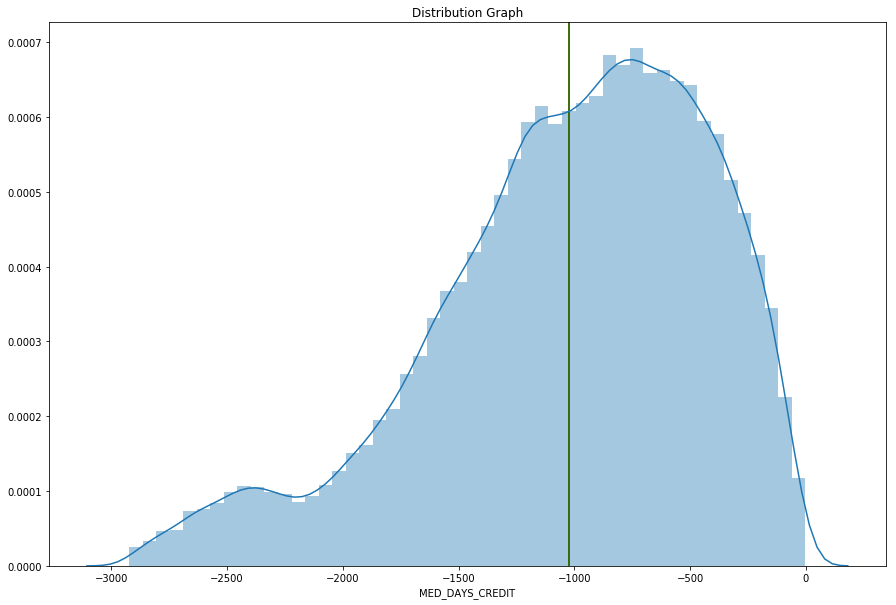

In [49]:
explore_numeric(new_features['MED_DAYS_CREDIT'])

### SUM_CREDIT_DAYS_OVERDUE

Total days of overdue credit across all bureau reports.

In [50]:
credit_day_overdue = bureau_data.groupby('SK_ID_CURR')['CREDIT_DAY_OVERDUE'].sum().rename(columns = {'SK_ID_CURR': 'SUM_CREDIT_DAYS_OVERDUE'})
df_credit_day_overdue = pd.DataFrame(data=credit_day_overdue, columns=['SUM_CREDIT_DAYS_OVERDUE'])
new_features = new_features.merge(df_credit_day_overdue, on='SK_ID_CURR')

numeric_features.append('SUM_CREDIT_DAYS_OVERDUE')

Max: 5134 Min: 0 Mean: 3.375155858659236 Avg: 3.375155858659236 Std: 73.91593731005518


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


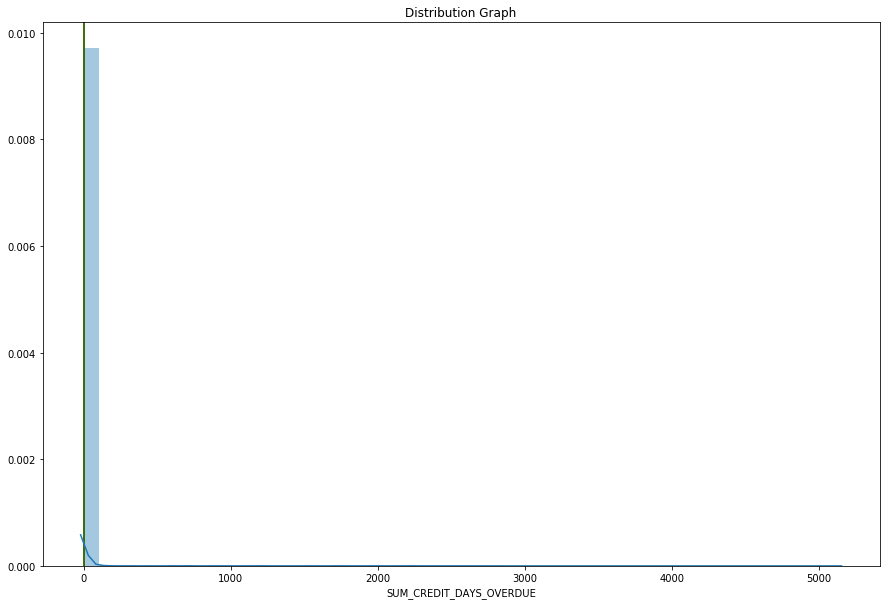

In [51]:
explore_numeric(new_features['SUM_CREDIT_DAYS_OVERDUE'])

### SUM_CREDIT_DAYS_ENDDATE
Remaining duration of CB credit (in days) at the time of application in Home Credit

In [52]:
credit_days_enddate = bureau_data.groupby('SK_ID_CURR')['DAYS_CREDIT_ENDDATE'].sum().rename(columns = {'SK_ID_CURR': 'SUM_DAYS_CREDIT_ENDDATE'})
df_credit_days_enddate = pd.DataFrame(data=credit_days_enddate, columns=['SUM_DAYS_CREDIT_ENDDATE'])
new_features = new_features.merge(df_credit_days_enddate, on='SK_ID_CURR')

numeric_features.append('SUM_DAYS_CREDIT_ENDDATE')

Max: 214193.0 Min: -49075.0 Mean: 3298.662900760048 Avg: 3298.662900760048 Std: 13257.902311120442


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


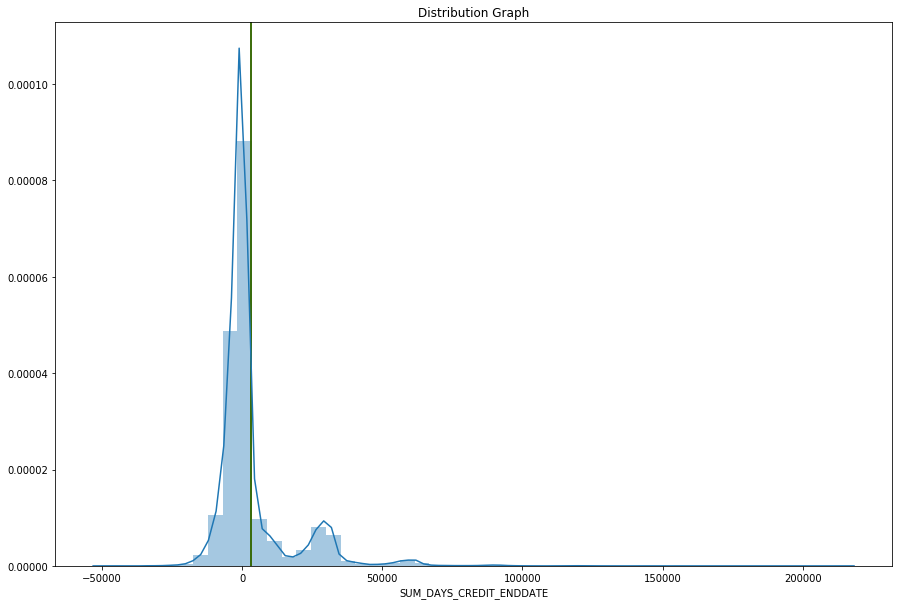

In [53]:
explore_numeric(new_features['SUM_DAYS_CREDIT_ENDDATE'])

### SUM_DAYS_ENDDATE_FACT
Days since CB credit ended at the time of application in Home Credit (only for closed credit)

In [54]:
days_enddate_fact = bureau_data.groupby('SK_ID_CURR')['DAYS_ENDDATE_FACT'].sum().rename(columns = {'SK_ID_CURR': 'SUM_DAYS_ENDDATE_FACT'})
df_days_enddate_fact = pd.DataFrame(data=days_enddate_fact, columns=['SUM_DAYS_ENDDATE_FACT'])
new_features = new_features.merge(df_days_enddate_fact, on='SK_ID_CURR')

numeric_features.append('SUM_DAYS_ENDDATE_FACT')

Max: 0.0 Min: -61740.0 Mean: -3510.2830718521973 Avg: -3510.2830718521973 Std: 4002.461852632849


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


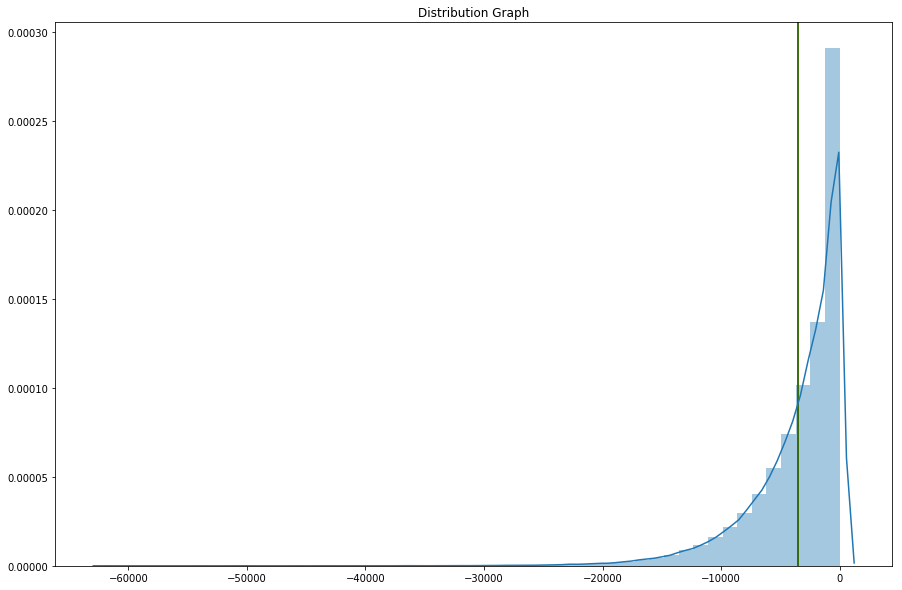

In [55]:
explore_numeric(np.nan_to_num(new_features['SUM_DAYS_ENDDATE_FACT']))

### SUM_AMT_CREDIT_MAX_OVERDUE
Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample)

In [56]:
credit_max_overdue = bureau_data.groupby('SK_ID_CURR')['AMT_CREDIT_MAX_OVERDUE'].sum().rename(columns = {'SK_ID_CURR': 'SUM_AMT_CREDIT_MAX_OVERDUE'})
df_credit_max_overdue = pd.DataFrame(data=credit_max_overdue, columns=['SUM_AMT_CREDIT_MAX_OVERDUE'])
new_features = new_features.merge(df_credit_max_overdue, on='SK_ID_CURR')

Max: 115987185.0 Min: 0.0 Mean: 8087.8715683447 Avg: 8087.8715683447 Std: 498221.1467473202


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


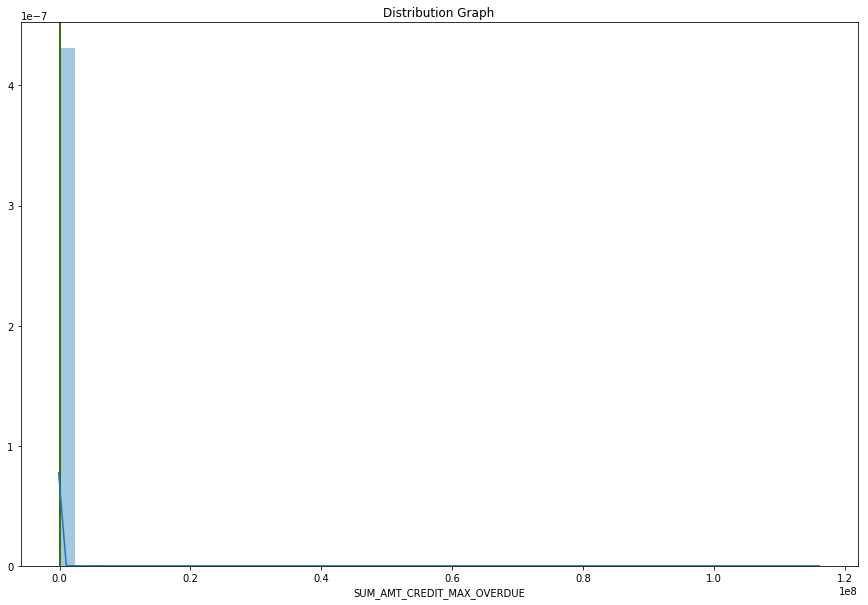

In [57]:
explore_numeric(new_features['SUM_AMT_CREDIT_MAX_OVERDUE'])

#### Preprocessing: 
This feature is skewed right, in that we have a large number of values near zero, and body of other values distributed across the range.

It's common to do a log transformation for fields like this. The result looks normally distributed.

Max: 18.568990277451633 Min: 0.0 Mean: 2.128310380161785 Avg: 2.128310380161785 Std: 3.908081426401892


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


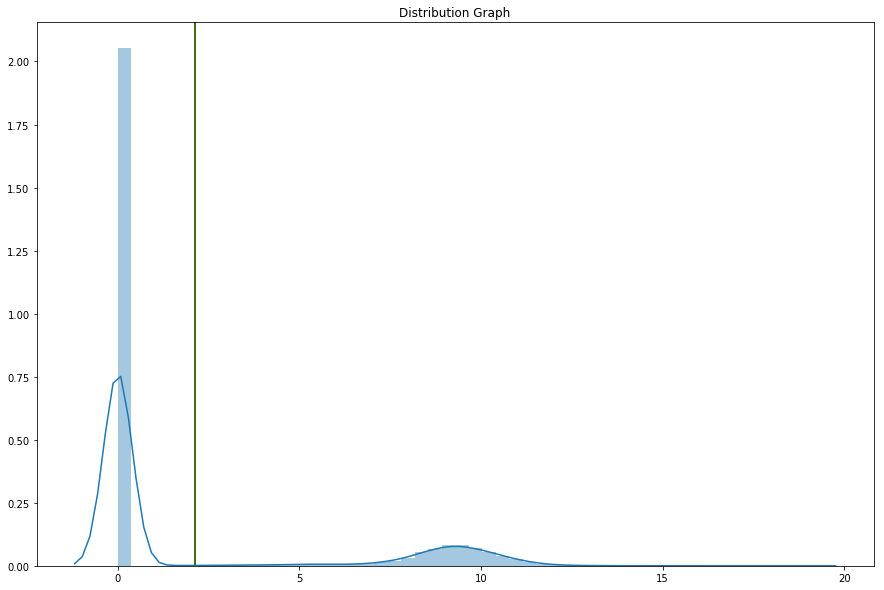

In [58]:
credit_max_overdue = new_features['SUM_AMT_CREDIT_MAX_OVERDUE']
credit_max_overdue = credit_max_overdue.apply(lambda x: np.log(x + 1))
credit_max_overdue = np.nan_to_num(credit_max_overdue, copy=True)

#visualize the new distribution
explore_numeric(credit_max_overdue)

log_transform_features.append('SUM_AMT_CREDIT_MAX_OVERDUE')

### SUM_CNT_CREDIT_PROLONG
How many times was the Credit Bureau credit prolonged

In [59]:
cnt_credit_prolong = bureau_data.groupby('SK_ID_CURR')['CNT_CREDIT_PROLONG'].sum().rename(columns = {'SK_ID_CURR': 'SUM_CNT_CREDIT_PROLONG'})
df_cnt_credit_prolong = pd.DataFrame(data=cnt_credit_prolong, columns=['SUM_CNT_CREDIT_PROLONG'])
new_features = new_features.merge(df_cnt_credit_prolong, on='SK_ID_CURR')

Max: 9 Min: 0 Mean: 0.041927334627186084 Avg: 0.041927334627186084 Std: 0.25537275134817056


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


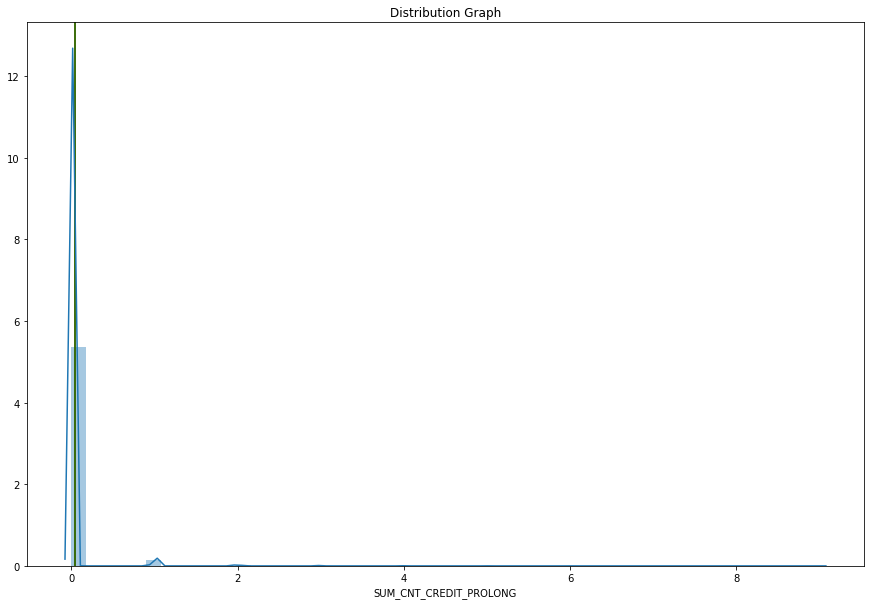

In [60]:
explore_numeric(new_features['SUM_CNT_CREDIT_PROLONG'])
numeric_features.append('SUM_CNT_CREDIT_PROLONG')

### SUM_AMT_CREDIT_SUM
Current credit amount for the Credit Bureau credit

In [61]:
amt_credit_sum = bureau_data.groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].sum().rename(columns = {'SK_ID_CURR': 'SUM_AMT_CREDIT_SUM'})
df_amt_credit_sum = pd.DataFrame(data=amt_credit_sum, columns=['SUM_AMT_CREDIT_SUM'])
new_features = new_features.merge(df_amt_credit_sum, on='SK_ID_CURR')

Max: 471622517.46000004 Min: 0.0 Mean: 2086333.6264027497 Avg: 2086333.6264027497 Std: 3893015.6319138394


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


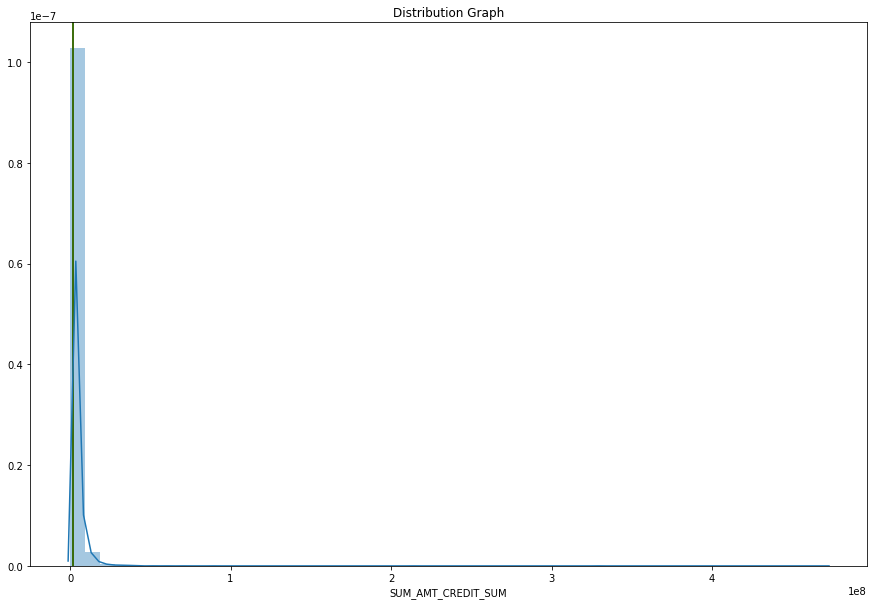

In [62]:
explore_numeric(new_features['SUM_AMT_CREDIT_SUM'])

#### Preprocessing: 
This feature is skewed right, in that we have a large number of values near zero, and body of other values distributed across the range.

It's common to do a log transformation for fields like this. The result looks normally distributed.

Max: 19.971689474554545 Min: 0.0 Mean: 13.672249762111342 Avg: 13.672249762111342 Std: 1.6614851297125857


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


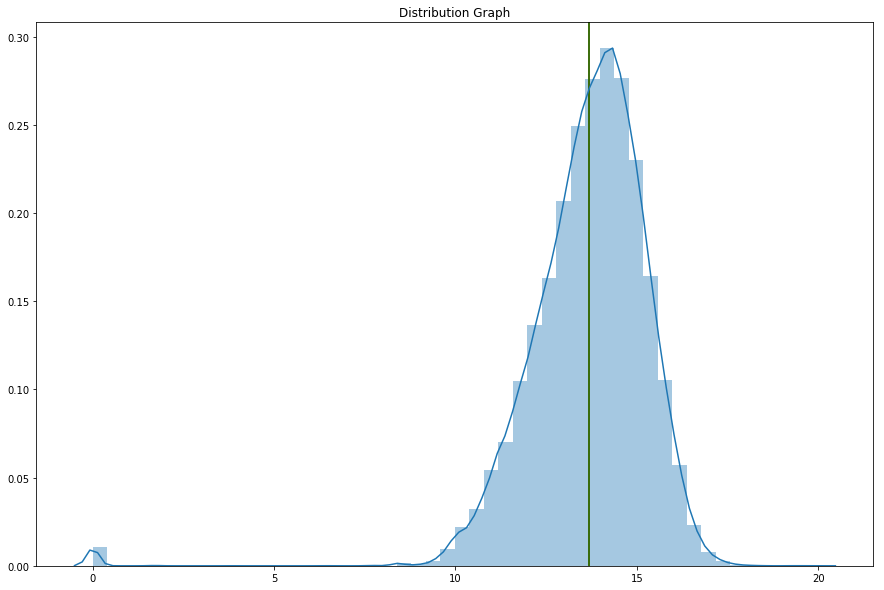

In [63]:
amt_credit_sum = new_features['SUM_AMT_CREDIT_SUM']
amt_credit_sum = amt_credit_sum.apply(lambda x: np.log(x + 1))
amt_credit_sum = np.nan_to_num(amt_credit_sum, copy=True)

#visualize the new distribution
explore_numeric(amt_credit_sum)

numeric_features.append('SUM_AMT_CREDIT_SUM')
#log_transform_features.append('SUM_AMT_CREDIT_SUM')

### SUM_AMT_CREDIT_SUM_DEBT
Current debt on Credit Bureau credit

In [64]:
amt_credit_sum_debt = bureau_data.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_DEBT'].sum().rename(columns = {'SK_ID_CURR': 'SUM_AMT_CREDIT_SUM_DEBT'})
df_amt_credit_sum_debt = pd.DataFrame(data=amt_credit_sum_debt, columns=['SUM_AMT_CREDIT_SUM_DEBT'])
new_features = new_features.merge(df_amt_credit_sum_debt, on='SK_ID_CURR')

Max: 334498331.20500004 Min: -1999478.475 Mean: 701263.8487294511 Avg: 701263.8487294511 Std: 1896001.633632184


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


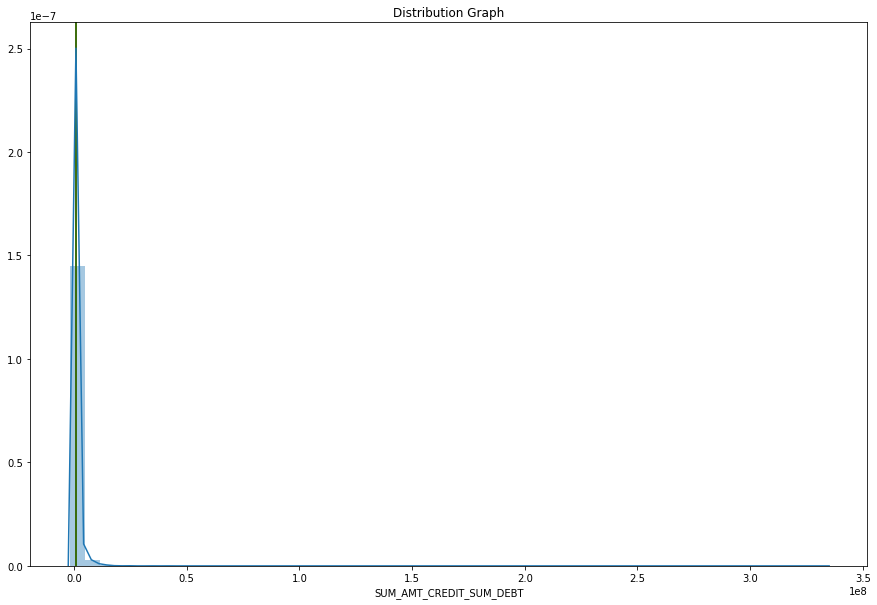

In [65]:
explore_numeric(new_features['SUM_AMT_CREDIT_SUM_DEBT'])

#### Preprocessing: 
This feature is skewed right, in that we have a large number of values near zero, and body of other values distributed across the range.

It's common to do a log transformation for fields like this. The result looks normally distributed.

Max: 19.628142451585898 Min: -0.6831968497067772 Mean: 9.255479152418317 Avg: 9.255479152418317 Std: 5.905479271753752


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


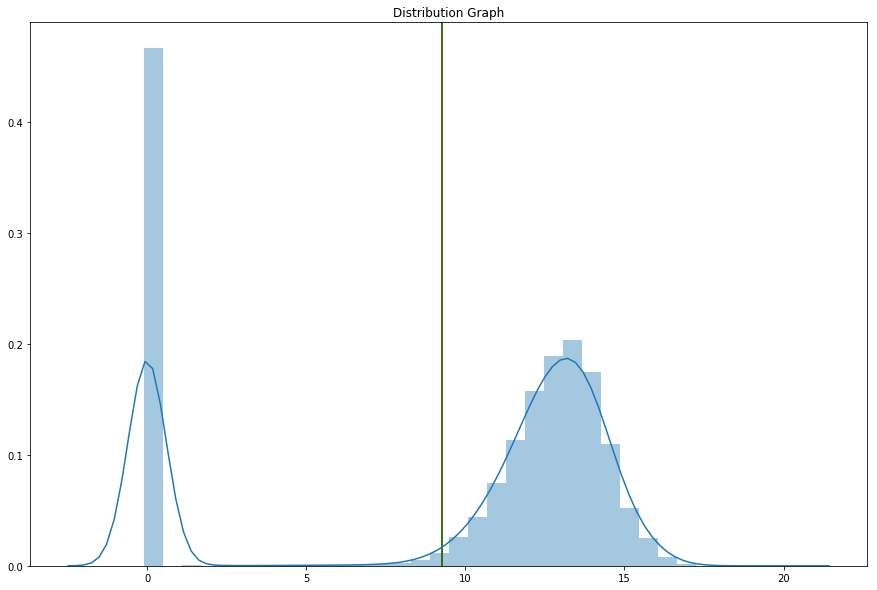

In [66]:
amt_credit_sum = new_features['SUM_AMT_CREDIT_SUM_DEBT']
amt_credit_sum = amt_credit_sum.apply(lambda x: np.log(x + 1))
amt_credit_sum = np.nan_to_num(amt_credit_sum, copy=True)

#visualize the new distribution
explore_numeric(amt_credit_sum)

numeric_features.append('SUM_AMT_CREDIT_SUM_DEBT')
#log_transform_features.append('SUM_AMT_CREDIT_SUM_DEBT')

### SUM_AMT_CREDIT_SUM_LIMIT
Current credit limit of credit card reported in Credit Bureau

In [67]:
amt_credit_sum_limit = bureau_data.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_LIMIT'].sum().rename(columns = {'SK_ID_CURR': 'SUM_AMT_CREDIT_SUM_LIMIT'})
df_amt_credit_sum_limit = pd.DataFrame(data=amt_credit_sum_limit, columns=['SUM_AMT_CREDIT_SUM_LIMIT'])
new_features = new_features.merge(df_amt_credit_sum_limit, on='SK_ID_CURR')

Max: 6412500.0 Min: -579854.115 Mean: 19812.152361559565 Avg: 19812.152361559565 Std: 88959.82608514922


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


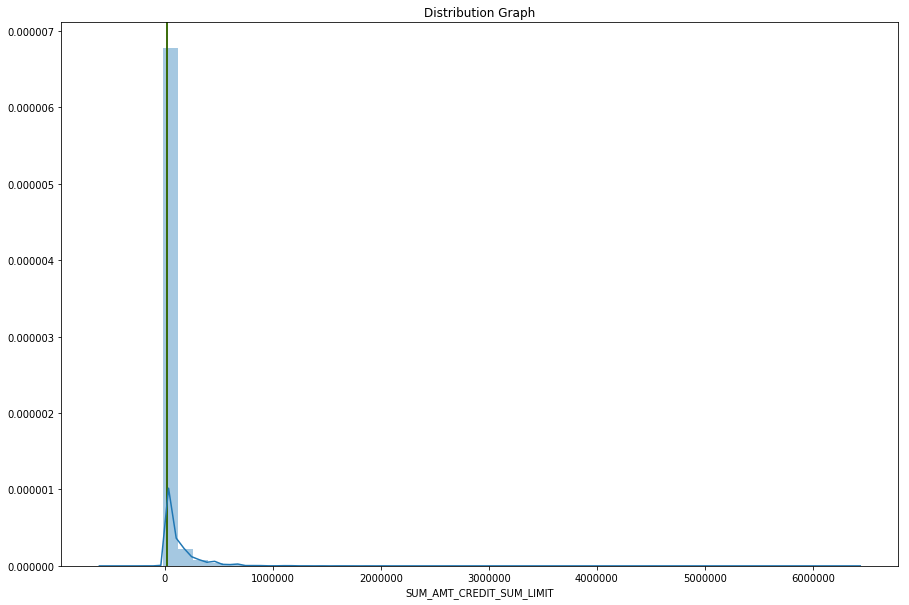

In [68]:
explore_numeric(new_features['SUM_AMT_CREDIT_SUM_LIMIT'])

#### Preprocessing: 
This feature is skewed left, in that we have a large number of values near zero, and body of other values distributed across the range.

It's common to do a log transformation for fields like this. The result looks normally distributed.

Max: 15.67375992440657 Min: 0.0 Mean: 1.8181465143948101 Avg: 1.8181465143948101 Std: 4.036439398420052


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


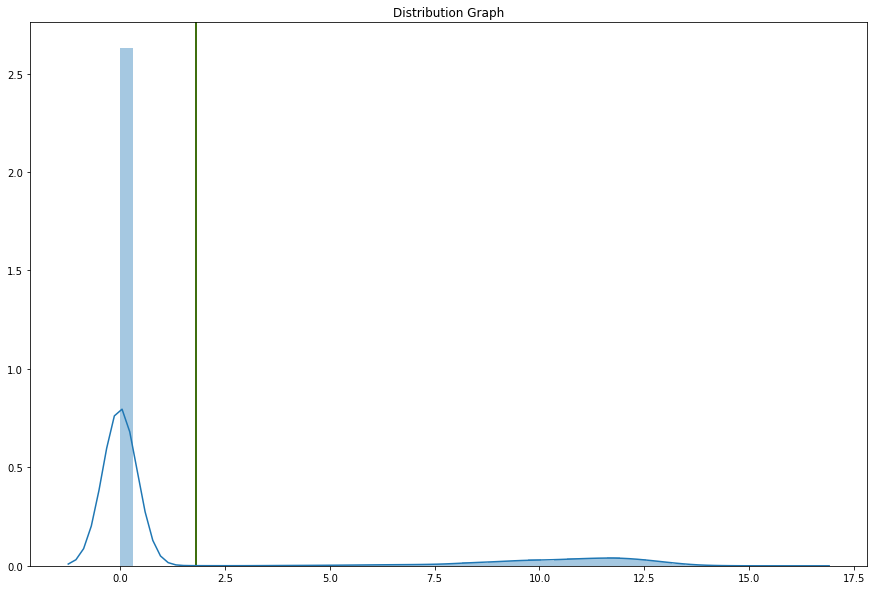

In [69]:
amt_credit_sum = new_features['SUM_AMT_CREDIT_SUM_LIMIT']
amt_credit_sum = amt_credit_sum.apply(lambda x: np.log(x + 1))
amt_credit_sum = np.nan_to_num(amt_credit_sum, copy=True)

#visualize the new distribution
explore_numeric(amt_credit_sum)

numeric_features.append('SUM_AMT_CREDIT_SUM_LIMIT')
#log_transform_features.append('SUM_AMT_CREDIT_SUM_LIMIT')

### SUM_DAYS_CREDIT_UPDATE
How many days before loan application did last information about the Credit Bureau creditt

In [70]:
days_credit_update = bureau_data.groupby('SK_ID_CURR')['DAYS_CREDIT_UPDATE'].sum().rename(columns = {'SK_ID_CURR': 'SUM_DAYS_CREDIT_UPDATE'})
df_days_credit_update = pd.DataFrame(data=days_credit_update, columns=['SUM_DAYS_CREDIT_UPDATE'])
new_features = new_features.merge(df_days_credit_update, on='SK_ID_CURR')

Max: 0 Min: -86851 Mean: -3147.7361733039866 Avg: -3147.7361733039866 Std: 3551.858912543587


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


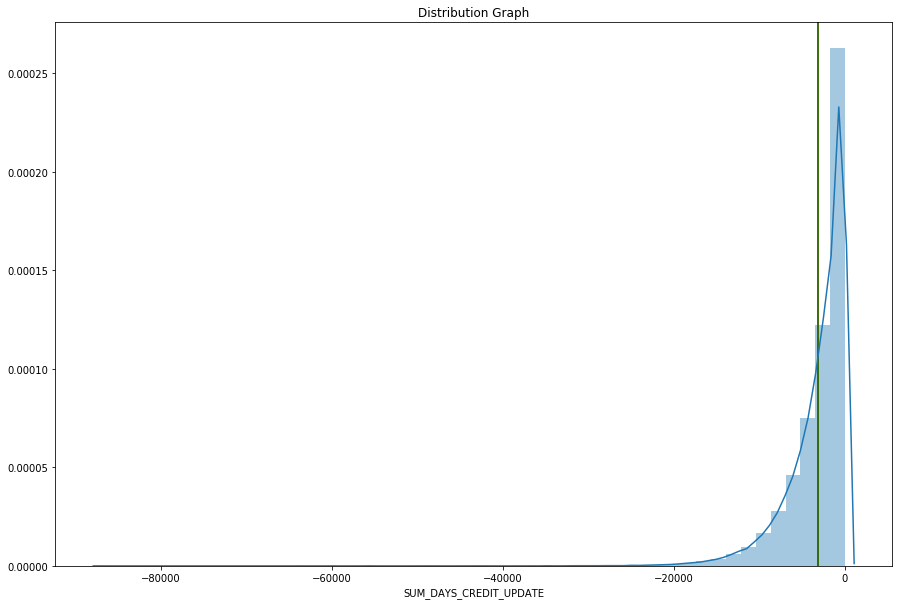

In [71]:
explore_numeric(new_features['SUM_DAYS_CREDIT_UPDATE'])
numeric_features.append('SUM_DAYS_CREDIT_UPDATE')

#### Merge New Features to Bureau Data

In [72]:
display(new_features.head()) 

application_train_merged = application_train.merge(new_features, on='SK_ID_CURR', how='left')
application_test_merged = application_test.merge(new_features, on='SK_ID_CURR', how='left')
display(application_train_merged.head())
display(application_test_merged.head())
print(application_train_merged.shape)
print(application_test_merged.shape)

,SK_ID_CURR,NUM_BUREAU_REPORTS,SUM_BUREAU_BALANCES,SUM_CREDIT_CURRENCY_CODE_0,SUM_CREDIT_CURRENCY_CODE_1,SUM_CREDIT_CURRENCY_CODE_2,SUM_CREDIT_CURRENCY_CODE_3,SUM_CREDIT_ACTIVE_CODE_0,SUM_CREDIT_ACTIVE_CODE_1,SUM_CREDIT_ACTIVE_CODE_2,SUM_CREDIT_ACTIVE_CODE_3,SUM_CREDIT_TYPE_CODE_0,SUM_CREDIT_TYPE_CODE_1,SUM_CREDIT_TYPE_CODE_2,SUM_CREDIT_TYPE_CODE_3,SUM_CREDIT_TYPE_CODE_4,SUM_CREDIT_TYPE_CODE_5,SUM_CREDIT_TYPE_CODE_6,SUM_CREDIT_TYPE_CODE_7,SUM_CREDIT_TYPE_CODE_8,SUM_CREDIT_TYPE_CODE_9,SUM_CREDIT_TYPE_CODE_10,SUM_CREDIT_TYPE_CODE_11,SUM_CREDIT_TYPE_CODE_12,SUM_CREDIT_TYPE_CODE_13,SUM_CREDIT_TYPE_CODE_14,SUM_STATUS_0,SUM_STATUS_1,SUM_STATUS_2,SUM_STATUS_3,SUM_STATUS_4,SUM_STATUS_5,SUM_STATUS_C,SUM_STATUS_X,MED_DAYS_CREDIT,SUM_CREDIT_DAYS_OVERDUE,SUM_DAYS_CREDIT_ENDDATE,SUM_DAYS_ENDDATE_FACT,SUM_AMT_CREDIT_MAX_OVERDUE,SUM_CNT_CREDIT_PROLONG,SUM_AMT_CREDIT_SUM,SUM_AMT_CREDIT_SUM_DEBT,SUM_AMT_CREDIT_SUM_LIMIT,SUM_DAYS_CREDIT_UPDATE
0,100002,8,110,8,0,0,0,2,0,6,0,0,0,0,4,4,0,0,0,0,0,0,0,0,0,0,45.0,27,0,0,0,0.0,23.0,15.0,-1042.5,0,-2094.0,-4185.0,8405.145,0,865055.565,245781.00,31988.565,-3999
1,100010,2,72,2,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,20.0,0,0,0,0,0.0,52.0,0.0,-1939.5,0,-239.0,-1138.0,0.000,0,990000.000,348007.50,0.000,-1156
2,100019,2,34,2,0,0,0,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,32.0,0,0,0,0,0.0,0.0,2.0,-495.0,0,10882.0,0.0,0.000,0,720000.000,245470.14,270000.000,-53
3,100032,4,76,4,0,0,0,1,0,3,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,68.0,0,0,0,0,0.0,0.0,8.0,-1169.5,0,-2101.0,-1910.0,0.000,0,1271160.000,0.00,0.000,-1747
4,100033,1,7,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0.0,0.0,6.0,-195.0,0,913.0,0.0,0.000,0,675000.000,0.00,0.000,-169


,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,BOOL_FLAG_EMAIL,BOOL_FLAG_EMP_PHONE,BOOL_FLAG_OWN_CAR,BOOL_FLAG_OWN_REALTY,BOOL_FLAG_PHONE,BOOL_FLAG_WORK_PHONE,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_MOBIL,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUR_APPR_PROCESS_START_0,HOUR_APPR_PROCESS_START_1,HOUR_APPR_PROCESS_START_10,HOUR_APPR_PROCESS_START_11,HOUR_APPR_PROCESS_START_12,HOUR_APPR_PROCESS_START_13,HOUR_APPR_PROCESS_START_14,HOUR_APPR_PROCESS_START_15,HOUR_APPR_PROCESS_START_16,HOUR_APPR_PROCESS_START_17,HOUR_APPR_PROCESS_START_18,HOUR_APPR_PROCESS_START_19,HOUR_APPR_PROCESS_START_2,HOUR_APPR_PROCESS_START_20,HOUR_APPR_PROCESS_START_21,HOUR_APPR_PROCESS_START_22,HOUR_APPR_PROCESS_START_23,HOUR_APPR_PROCESS_START_3,HOUR_APPR_PROCESS_START_4,HOUR_APPR_PROCESS_START_5,HOUR_APPR_PROCESS_START_6,HOUR_APPR_PROCESS_START_7,HOUR_APPR_PROCESS_START_8,HOUR_APPR_PROCESS_START_9,HOUSETYPE_MODE_not specified,HOUSETYPE_MODE_org spec account,HOUSETYPE_MODE_reg oper account,HOUSETYPE_MODE_reg oper spec account,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUP

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,BOOL_FLAG_EMAIL,BOOL_FLAG_EMP_PHONE,BOOL_FLAG_OWN_CAR,BOOL_FLAG_OWN_REALTY,BOOL_FLAG_PHONE,BOOL_FLAG_WORK_PHONE,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_MOBIL,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUR_APPR_PROCESS_START_0,HOUR_APPR_PROCESS_START_1,HOUR_APPR_PROCESS_START_10,HOUR_APPR_PROCESS_START_11,HOUR_APPR_PROCESS_START_12,HOUR_APPR_PROCESS_START_13,HOUR_APPR_PROCESS_START_14,HOUR_APPR_PROCESS_START_15,HOUR_APPR_PROCESS_START_16,HOUR_APPR_PROCESS_START_17,HOUR_APPR_PROCESS_START_18,HOUR_APPR_PROCESS_START_19,HOUR_APPR_PROCESS_START_2,HOUR_APPR_PROCESS_START_20,HOUR_APPR_PROCESS_START_21,HOUR_APPR_PROCESS_START_22,HOUR_APPR_PROCESS_START_23,HOUR_APPR_PROCESS_START_3,HOUR_APPR_PROCESS_START_4,HOUR_APPR_PROCESS_START_5,HOUR_APPR_PROCESS_START_6,HOUR_APPR_PROCESS_START_7,HOUR_APPR_PROCESS_START_8,HOUR_APPR_PROCESS_START_9,HOUSETYPE_MODE_not specified,HOUSETYPE_MODE_org spec account,HOUSETYPE_MODE_reg oper account,HOUSETYPE_MODE_reg oper spec account,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUP

(307511, 315)
(48744, 314)


### Export

In [ ]:
application_train_merged.to_csv('data/tmp/application_train_bureau_data_merged.csv')
application_test_merged.to_csv('data/tmp/application_test_bureau_data_merged.csv')

In [ ]:
# Export the lists of fields that need preprocessing.
if (len(non_numeric_features) > 0): 
    df_non_numeric_features = pd.DataFrame({'features': non_numeric_features})
    df_non_numeric_features.to_csv('data/tmp/bureau_non_numeric_features.csv')

if (len(numeric_features) > 0):    
    df_numeric_features = pd.DataFrame({'features': numeric_features})
    df_numeric_features.to_csv('data/tmp/bureau_numeric_features.csv')

if (len(string_to_bool_features) > 0):
    df_string_to_bool_features = pd.DataFrame({'features': string_to_bool_features})
    df_string_to_bool_features.to_csv('data/tmp/bureau_string_to_bool.csv')

if (len(log_transform_features) > 0): 
    df_log_transform_features = pd.DataFrame({'features': log_transform_features})
    df_log_transform_features.to_csv('data/tmp/bureau_log_transform.csv')